In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy import stats
import re
from scipy.stats.stats import pearsonr
#import rpy2.robjects as robjects
import random
from statsmodels.stats.multitest import fdrcorrection
import copy
from collections import Counter
import seaborn as sns
#"#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F" "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99"
#"#B15928"
palette = {"Human":"#E31A1C", 
           "Chimp":"#1F78B4",
          "Rhesus":"#6A3D9A",
          "Orangutan":"#FF7F00",
          "Marmoset":"#FFFF99",
          "Gorilla":"#A6CEE3",
          "Mouse":"#CAB2D6",
          "Bonobo":"#B15928",
          "human":"#E31A1C", 
           "chimp":"#1F78B4",
          "rhesus":"#6A3D9A",
          "orangutan":"#FF7F00",
          "marmoset":"#FFFF99",
          "gorilla":"#A6CEE3",
          "mouse":"#CAB2D6",
          "bonobo":"#B15928",
          "Human_ctrl":"#E31A1C",
          "Human_aut":"black"}

#####
#Return a list of files used to construct chart at end
#Example dataset description
#Send list of autocomplete genes.
#Gitlab or google drive to host the gzipped tarred raw files.
#Make a github and darren can push his code to it.
#Switch to function to read in file data.
#####
def read_file(file, output, gene, t, species = "Chimp", h = False):
    tpm = pd.read_csv(file, sep = "\t")
    tpm_gene = tpm.loc[gene]
    if h:
        for index in tpm_gene.index:
            if "Human" in index or "human" in index:
                output.append([tpm_gene[index], "Human", t])
            elif species in index or species.lower() in index:
                output.append([tpm_gene[index], species, t])
            elif species == "Rhesus" and "Macaque" in index:
                output.append([tpm_gene[index], species, t])
    else:
        for index in tpm_gene.index:
            if species in index or species.lower() in index:
                output.append([tpm_gene[index], species, t])
            elif species == "Rhesus" and "Macaque" in index:
                output.append([tpm_gene[index], species, t])
    return output

def read_file_h(file, output, gene, t, species = "Chimp", h = False):
    tpm = pd.read_csv(file, sep = "\t")
    tpm_gene = tpm.loc[gene]
    if h:
        for index in tpm_gene.index:
            if "_ha" in index or "_hb" in index or "_hc" in index or "_hd" in index:
                output.append([tpm_gene[index], "Human", t])
    if species == "Chimp":
        for index in tpm_gene.index:
            if "_cb" in index or "_cc" in index or "_cd" in index:
                output.append([tpm_gene[index], "Chimp", t])
    if species == "Bonobo":
        for index in tpm_gene.index:
            if "_ba" in index or "_bb" in index or "_bc" in index:
                output.append([tpm_gene[index], "Bonobo", t])
    if species == "Rhesus":
        for index in tpm_gene.index:
            if "_ma" in index or "_mb" in index or "_mc" in index:
                output.append([tpm_gene[index], "Rhesus", t])
    return output

def read_file_p(file, output, gene, t, species = "Chimp", h = True):
    tpm = pd.read_csv(file, sep = "\t")
    tpm_gene = tpm.loc[gene]
    if h:
        for index in tpm_gene.index:
            if "H2" in index:
                output.append([tpm_gene[index], "Human", t])
            elif "C3" in index:
                output.append([tpm_gene[index], species, t])
    return output

def read_de(file, gene, output, comp):
    de = pd.read_csv(file, sep = "\t")
    de = de.set_index("Gene")
    de_gene = de.loc[gene]
    output.append([comp, round(float(de_gene["log2FoldChange"]), 5), float(de_gene["pvalue"]), float(de_gene["padj_mine"])])
    return output

<AxesSubplot:title={'center':'Expression of FN1'}, xlabel='Time After Serum Challenge', ylabel='TPM'>

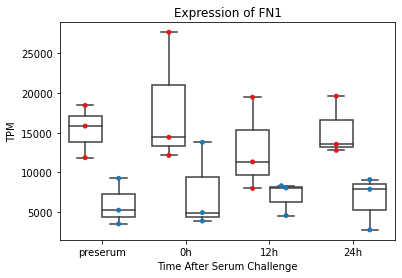

In [27]:
def plot_BaFib2018_tpm(gene, times = ["preserum", "0h", "12h", "24h"], ks = "STAR"):
    folder = "Babbitt_Fibroblast_2018/" + ks
    if ks == "STAR":
        skel = "Babbitt_Fibroblast_2018_0h_DESeq2.txt_tpm.txt"
    else:
        skel = "Babbitt_Fibroblast_2018_0h_Kallisto_DESeq2_Kallisto_tpm.txt"
    output = []
    for t in times:
        file = folder + "/" + skel.replace("0h", t)
        output = read_file(file, output, gene, t, h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Time After Serum Challenge"]
    ax = sns.swarmplot(x="Time After Serum Challenge", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Time After Serum Challenge", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = times)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Time After Serum Challenge")
    ax.set_title("Expression of " + gene)
    return ax
plot_BaFib2018_tpm("FN1", ks = "STAR")

In [16]:
def table_BaFib2018(gene, times = ["preserum", "0h", "12h", "24h"], ks = "STAR"):
    folder = "Babbitt_Fibroblast_2018/" + ks
    if ks == "STAR":
        skel = "Babbitt_Fibroblast_2018_0h_DESeq2.txt"
    else:
        skel = "Babbitt_Fibroblast_2018_0h_Kallisto_DESeq2.txt"
    output = []
    for t in times:
        file = folder + "/" + skel.replace("0h", t)
        output = read_de(file, gene, output, "HumChp")
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = times
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [17]:
table_BaFib2018("FN1", ks = "Kallisto")

FN1 DESeq2 Information

         Comparison  log2FoldChange   p-value       FDR
preserum     HumChp        0.619920  0.054060  0.259038
0h           HumChp        0.220725  0.525320  0.878444
12h          HumChp        0.453909  0.192294  0.572416
24h          HumChp        0.902165  0.000482  0.007608


<AxesSubplot:title={'center':'Expression of KCNA1'}, xlabel='Region', ylabel='TPM'>

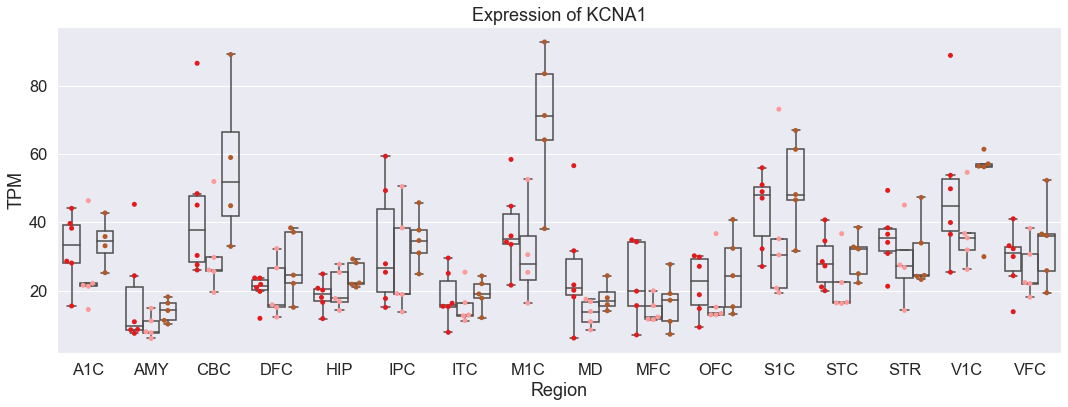

In [28]:
def plot_SoSe2017(gene, regions = ["A1C", "AMY", "CBC", "DFC", "HIP", "IPC", "ITC", "M1C", "MD", "MFC", "OFC", "S1C", "STC", "STR", "V1C", "VFC"], ks = "STAR"):
    folder = "Sousa_Sestan_2017/" + ks
    output = []
    if ks == "STAR":
        skel = "Sousa_Sestan_2017_DESeq2_HumChp_A1C.txt_tpm.txt"
    else:
        skel = "Sousa_Sestan_2017_Kallisto_DESeq2_HumChp_A1C_Kallisto_tpm.txt"
    for t in regions:
        file = folder + "/" + skel.replace("A1C", t)
        output = read_file(file, output, gene, t, h = True)
    if ks == "STAR":
        skel = "Sousa_Sestan_2017_DESeq2_HumRhe_A1C.txt_tpm.txt"
    else:
        skel = "Sousa_Sestan_2017_Kallisto_DESeq2_HumRhe_A1C_Kallisto_tpm.txt"
    for t in regions:
        file = folder + "/" + skel.replace("A1C", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)

    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Region"]
    fig, ax = plt.subplots(figsize=(18,6))
    ax = sns.swarmplot(x="Region", y="TPM", hue = "Species", data=df, dodge = True, order = regions, palette = palette)
    ax = sns.boxplot(x="Region", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = regions)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Region")
    ax.set_title("Expression of " + gene)
    return ax
plot_SoSe2017("KCNA1", ks = "Kallisto")

In [18]:
def table_SoSe2017(gene, regions = ["A1C", "AMY", "CBC", "DFC", "HIP", "IPC", "ITC", "M1C", "MD", "MFC", "OFC", "S1C", "STC", "STR", "V1C", "VFC"], ks = "STAR"):
    folder = "Sousa_Sestan_2017/" + ks
    if ks == "STAR":
        skel = "Sousa_Sestan_2017_DESeq2_HumChp_A1C.txt"
    else:
        skel = "Sousa_Sestan_2017_Kallisto_DESeq2_HumChp_A1C_Kallisto_tpm.txt"
    output = []
    ind = []
    for t in regions:
        de = folder + "/" + skel.replace("A1C", t)
        de2 = folder + "/" + skel.replace("A1C", t).replace("Chp", "Rhe")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        ind = ind + [t, t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [19]:
table_SoSe2017("OXTR")

OXTR DESeq2 Information

    Comparison  log2FoldChange       p-value           FDR
A1C     HumChp        0.529675  1.248008e-01  4.053251e-01
A1C     HumRhe        1.713523  1.396526e-05  1.174712e-04
AMY     HumChp        1.954440  7.459785e-07  1.525594e-05
AMY     HumRhe        3.189482  1.104433e-10  2.332997e-09
CBC     HumChp        0.424806  2.927813e-01  6.297713e-01
CBC     HumRhe        0.604927  1.863776e-01  3.790023e-01
DFC     HumChp        1.034940  8.633921e-03  4.964148e-02
DFC     HumRhe        2.305517  2.823677e-06  2.980351e-05
HIP     HumChp        1.755926  1.667325e-04  1.822120e-03
HIP     HumRhe        2.733243  2.737793e-07  3.085194e-06
IPC     HumChp        0.322265  2.434369e-01  5.477443e-01
IPC     HumRhe        1.114489  1.540488e-03  6.071762e-03
ITC     HumChp        1.144973  1.545418e-03  1.081526e-02
ITC     HumRhe        2.654331  1.154980e-07  1.438379e-06
M1C     HumChp       -0.076252  8.396993e-01  9.461695e-01
M1C     HumRhe        1.414066 

In [7]:
def plot_FeHaus2018_tpm(gene, times = ["Week0", "Week1", "Week2", "Week3", "Week4", "Week5"], ks = "STAR"):
    folder = "Field_Haussler_2018/" + ks
    output = []
    for t in times:
        if ks == "STAR":
            skel = "Field_Haussler_2018_DESeq2_HumChp_Week0.txt_tpm.txt"
        else:
            skel = "Field_Haussler_2018_Kallisto_DESeq2_HumChp_Week0_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Week0", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
        if ks == "STAR":
            skel = "Field_Haussler_2018_DESeq2_HumRhe_Week0.txt_tpm.txt"
        else:
            skel = "Field_Haussler_2018_Kallisto_DESeq2_HumRhe_Week0_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Week0", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
        if ks == "STAR":
            skel = "Field_Haussler_2018_DESeq2_HumOrg_Week0.txt_tpm.txt"
        else:
            skel = "Field_Haussler_2018_Kallisto_DESeq2_HumOrg_Week0_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Week0", t)
        output = read_file(file, output, gene, t, species = "Orangutan", h = False)
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Time Since Differentiation"]
    ax = sns.swarmplot(x="Time Since Differentiation", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Time Since Differentiation", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = times)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Time Since Differentiation")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of MDH2'}, xlabel='Time Since Differentiation', ylabel='TPM'>

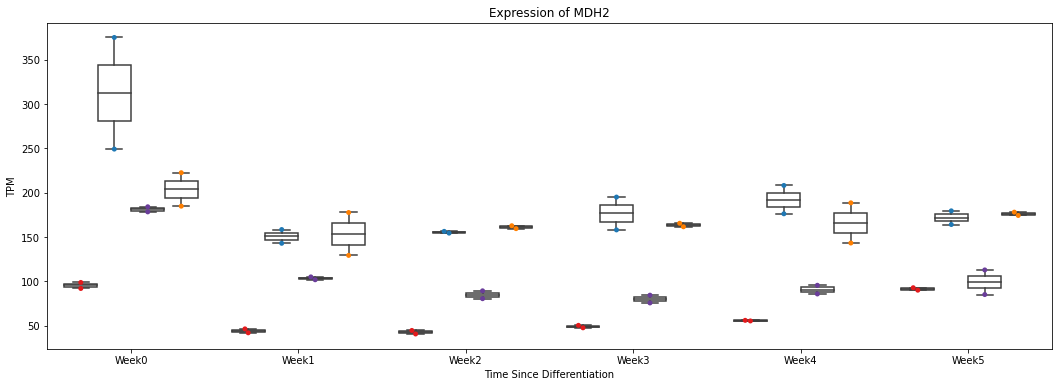

In [33]:
plot_FeHaus2018_tpm("MDH2", ks = "STAR")

In [3]:
def table_FeHaus2018(gene, times = ["Week0", "Week1", "Week2", "Week3", "Week4", "Week5"], ks = "STAR"):
    ind = []
    folder = "Field_Haussler_2018/" + ks
    if ks == "STAR":
        skel = "Field_Haussler_2018_DESeq2_HumChp_Week0.txt"
    else:
        skel = "Field_Haussler_2018_Kallisto_DESeq2_HumChp_Week0.txt"
    output = []
    for t in times:
        de = folder + "/" + skel.replace("Week0", t)
        de2 = folder + "/" + skel.replace("Week0", t).replace("Chp", "Rhe")
        de3 = folder + "/" + skel.replace("Week0", t).replace("Chp", "Org")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        output = read_de(de3, gene, output, "HumOrg")
        ind = ind + [t, t, t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    #print(gene + " DESeq2 Information")
    #print("")
    #print(df)
    return(df)

In [34]:
table_FeHaus2018("MDH2", ks = "STAR")

,Comparison,log2FoldChange,p-value,FDR
Week0,HumChp,-1.90793,2.394697e-20,4.018826e-19
Week0,HumRhe,-0.93744,7.231898e-19,9.171562e-18
Week0,HumOrg,-1.18722,6.435291e-08,4.796287e-07
Week1,HumChp,-1.94090,3.843529e-42,2.035392e-40
Week1,HumRhe,-1.25837,9.206239e-20,1.603655e-18
Week1,HumOrg,-1.91121,6.041387e-19,1.206522e-17
Week2,HumChp,-1.85920,1.376895e-33,7.081692e-32
Week2,HumRhe,-0.95286,5.089204e-08,4.373014e-07
Week2,HumOrg,-1.96440,2.449681e-29,7.456691e-28
Week3,HumChp,-1.80842,2.039340e-22,7.248816e-21


In [36]:
def plot_BeKon2019(gene, cells = ["Neuron", "Oligo"], ks = "STAR"):
    folder = "Berto_Konopka_2019/" + ks
    output = []
    if ks == "STAR":
        skel = "Berto_Konopka_2019_DESeq2_HumChp_Neuron_tpm.txt"
    else:
        skel = "Berto_Konopka_2019_Kallisto_DESeq2_HumChp_Neuron_Kallisto_tpm.txt"
    for t in cells:
        file = folder + "/" + skel.replace("Neuron", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Berto_Konopka_2019_DESeq2_HumRhe_Neuron_tpm.txt"
    else:
        skel = "Berto_Konopka_2019_Kallisto_DESeq2_HumRhe_Neuron_Kallisto_tpm.txt"
    for t in cells:
        file = folder + "/" + skel.replace("Neuron", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cells, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cells)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

C:\Users\astar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\astar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Expression of ABCA13'}, xlabel='Cell Type', ylabel='TPM'>

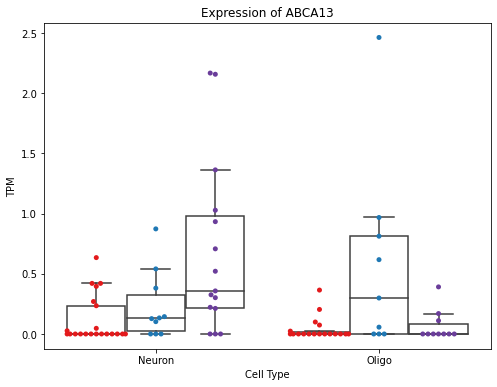

In [37]:
plot_BeKon2019("ABCA13", ks = "STAR")

In [77]:
def table_BeKon2019(gene, cells = ["Neuron", "Oligo"], ks = "STAR", shrunk = True):
    if shrunk:
        folder = "Berto_Konopka_2019/" + ks + "/" + "Shrunk"
    else:
        folder = "Berto_Konopka_2019/" + ks
    if ks == "STAR":
        skel = "Berto_Konopka_2019_DESeq2_HumRhe_Neuron.txt"
    else:
        skel = "Berto_Konopka_2019_Kallisto_DESeq2_HumChp_Neuron.txt"
    output = []
    ind = []
    for t in cells:
        de = folder + "/" + skel.replace("Neuron", t)
        de2 = folder + "/" + skel.replace("Neuron", t).replace("Chp", "Rhe")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        ind = ind + [t, t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [78]:
table_BeKon2019("ZNF558", ks = "Kallisto", shrunk = False)

ZNF558 DESeq2 Information

       Comparison  log2FoldChange       p-value           FDR
Neuron     HumChp       -1.178442  1.202024e-06  3.898264e-05
Neuron     HumRhe       -1.922119  5.168428e-09  1.127952e-07
Oligo      HumChp       -0.628759  1.445163e-01  4.116138e-01
Oligo      HumRhe       -0.716416  1.839394e-01  3.932161e-01


In [95]:
def plot_BlaGil2020(gene, organs = ["Liver", "Heart", "Lung", "Kidney"], ks = "STAR"):
    folder = "Blake_Gilad_2020/" + ks
    output = []
    if ks == "STAR":
        skel = "Blake_Gilad_2020_DESeq2_HumChp_Heart.txt_tpm.txt"
    else:
        skel = "Blake_Gilad_2020_Kallisto_DESeq2_HumChp_Heart_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel.replace("Heart", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Blake_Gilad_2020_DESeq2_HumRhe_Heart.txt_tpm.txt"
    else:
        skel = "Blake_Gilad_2020_Kallisto_DESeq2_HumRhe_Heart_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel.replace("Heart", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of HMGCS2'}, xlabel='Cell Type', ylabel='TPM'>

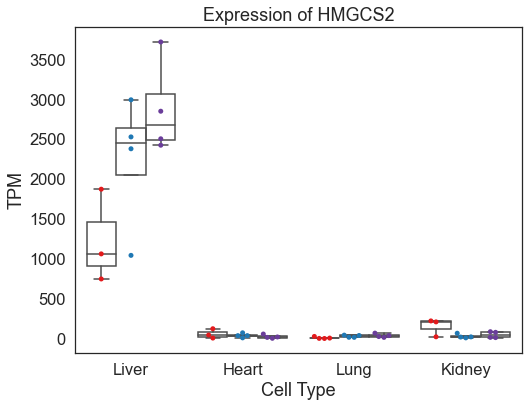

In [96]:
plot_BlaGil2020("HMGCS2", ks = "STAR")

In [79]:
def table_BlaGil2020(gene, organs = ["Liver", "Heart", "Lung", "Kidney"], ks = "STAR"):
    folder = "Blake_Gilad_2020/" + ks
    if ks == "STAR":
        skel = "Blake_Gilad_2020_DESeq2_HumChp_Heart.txt"
    else:
        skel = "Blake_Gilad_2020_Kallisto_DESeq2_HumChp_Heart.txt"
    output = []
    ind = []
    for t in organs:
        de = folder + "/" + skel.replace("Heart", t)
        de2 = folder + "/" + skel.replace("Heart", t).replace("Chp", "Rhe")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        ind = ind + [t, t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [80]:
table_BlaGil2020("ZNF558", ks = "Kallisto")

ZNF558 DESeq2 Information

       Comparison  log2FoldChange       p-value           FDR
Liver      HumChp        1.985964  1.058628e-09  1.067373e-07
Liver      HumRhe        1.803052  1.048105e-09  4.101887e-08
Heart      HumChp        0.583444  6.806916e-02  4.711843e-01
Heart      HumRhe        0.595365  1.422080e-01  4.215529e-01
Lung       HumChp        1.073878  5.408757e-05  1.170800e-03
Lung       HumRhe        0.944756  3.036785e-04  1.703224e-03
Kidney     HumChp        0.820696  2.000514e-03  2.470177e-02
Kidney     HumRhe        1.633089  1.044927e-07  2.512520e-06


In [49]:
def plot_PavGilCard2018_tpm(gene, times = ["Day15", "Day27"], ks = "STAR"):
    folder = "Pavlovic_Gilad_Cardio_2018/" + ks
    if ks == "STAR":
        skel = "Pavlovic_Gilad_2018_DESeq2_HumChp_Car_Day15_tpm.txt"
    else:
        skel = "Pavlovic_Gilad_2018_Kallisto_DESeq2_HumChp_Caridomyocytes_Day15_Scale_Kallisto_tpm.txt"
    output = []
    for t in times:
        file = folder + "/" + skel.replace("Day15", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Differentiation Time (Cardiomyocytes)"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Differentiation Time (Cardiomyocytes)", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Differentiation Time (Cardiomyocytes)", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = times)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Differentiation Time (Cardiomyocytes)")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of WNT9A'}, xlabel='Differentiation Time (Cardiomyocytes)', ylabel='TPM'>

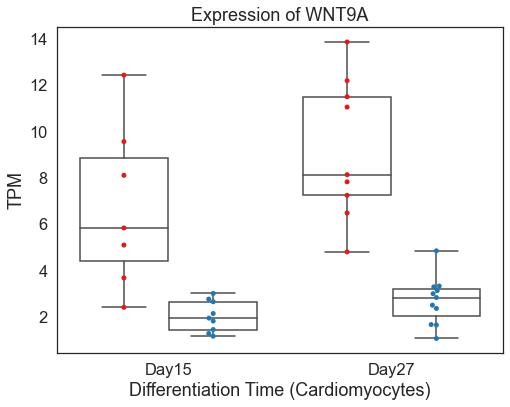

In [90]:
plot_PavGilCard2018_tpm("WNT9A", ks = "STAR")

In [75]:
def table_PavGilCard2018(gene, times = ["Day15", "Day27"], ks = "STAR"):
    folder = "Pavlovic_Gilad_Cardio_2018/" + ks
    if ks == "STAR":
        skel = "Pavlovic_Gilad_2018_DESeq2_HumChp_Caridomyocytes_Day15_Scale.txt"
    else:
        skel = "Pavlovic_Gilad_2018_Kallisto_DESeq2_HumChp_Caridomyocytes_Day15_Scale.txt"
    output = []
    for t in times:
        de = folder + "/" + skel.replace("Day15", t)
        output = read_de(de, gene, output, "HumChp")
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = times
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [94]:
table_PavGilCard2018("SLITRK5", ks = "STAR")

SLITRK5 DESeq2 Information

      Comparison  log2FoldChange   p-value       FDR
Day15     HumChp         0.92442  0.003869  0.012444
Day27     HumChp        -0.41589  0.147944  0.294124


In [78]:
def plot_PavGilHeart2018_tpm(gene, organs = ["Heart"], ks = "STAR"):
    folder = "Pavlovic_Gilad_Primary_Heart_2018/" + ks
    if ks == "STAR":
        skel = "Pavlovic_Gilad_2018_DESeq2_HumChp_Primary_Heart_tpm.txt"
    else:
        skel = "Pavlovic_Gilad_2018_Kallisto_DESeq2_HumChp_Primary_Heart_Kallisto_tpm.txt"
    output = []
    for t in organs:
        file = folder + "/" + skel.replace("Day15", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Organ")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of SLITRK5'}, xlabel='Organ', ylabel='TPM'>

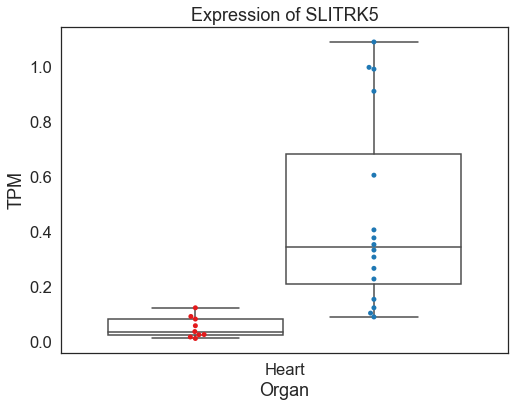

In [93]:
plot_PavGilHeart2018_tpm("SLITRK5", ks = "STAR")

In [85]:
def table_PavGilHeart2018(gene, organs = ["Heart"], ks = "STAR"):
    folder = "Pavlovic_Gilad_Primary_Heart_2018/" + ks
    if ks == "STAR":
        skel = "Pavlovic_Gilad_2018_DESeq2_HumChp_Primary_Heart.txt"
    else:
        skel = "Pavlovic_Gilad_2018_Kallisto_DESeq2_HumChp_Primary_Heart.txt"
    output = []
    for t in organs:
        de = folder + "/" + skel.replace("Heart", t)
        output = read_de(de, gene, output, "HumChp")
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = organs
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [86]:
table_PavGilHeart2018("CTNNA3", ks = "Kallisto")

CTNNA3 DESeq2 Information

      Comparison  log2FoldChange   p-value       FDR
Heart     HumChp       -0.331195  0.215574  0.440171


In [162]:
def plot_PavGiliPSC2018_tpm(gene, cells = ["iPSC"], ks = "STAR"):
    folder = "Pavlovic_Gilad_iPSC_2018/" + ks
    if ks == "STAR":
        skel = "Pavlovic_Gilad_2018_DESeq2_HumChp_iPSCs_tpm.txt"
    else:
        skel = "Pavlovic_Gilad_2018_Kallisto_DESeq2_HumChp_iPSCs_Kallisto_tpm.txt"
    output = []
    for t in cells:
        file = folder + "/" + skel.replace("Day15", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cells, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cells)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of CTNNA3'}, xlabel='Cell Type', ylabel='TPM'>

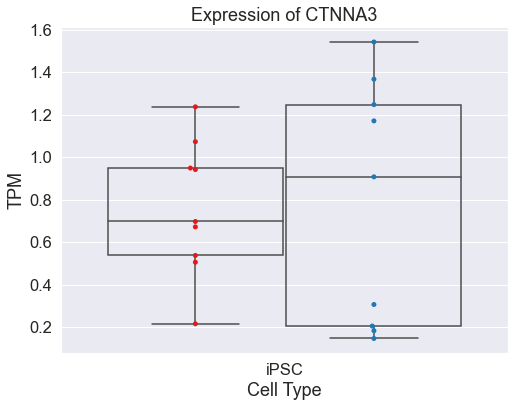

In [163]:
plot_PavGiliPSC2018_tpm("CTNNA3", ks = "Kallisto")

In [87]:
def table_PavGiliPSC2018(gene, cells = ["iPSC"], ks = "STAR"):
    folder = "Pavlovic_Gilad_iPSC_2018/" + ks
    if ks == "STAR":
        skel = "Pavlovic_Gilad_2018_DESeq2_HumChp_iPSCs.txt"
    else:
        skel = "Pavlovic_Gilad_2018_Kallisto_DESeq2_HumChp_iPSCs.txt"
    output = []
    for t in cells:
        de = folder + "/" + skel.replace("Heart", t)
        output = read_de(de, gene, output, "HumChp")
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = cells
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [88]:
table_PavGiliPSC2018("EDNRB", ks = "STAR")

EDNRB DESeq2 Information

     Comparison  log2FoldChange       p-value           FDR
iPSC     HumChp        3.726221  2.147837e-10  2.134847e-09


In [160]:
def plot_BlaPav2018_tpm(gene, cells = ["iPSC", "Primary_Streak", "Endoderm_Progenitor", "Definitive_Endoderm"], ks = "STAR"):
    folder = "Blake_Pavlovic_2018/" + ks
    if ks == "STAR":
        skel = "Blake_Pavlovic_2018_DESeq2_HumChp_iPSC_tpm.txt"
    else:
        skel = "Blake_Pavlovic_2018_Kallisto_DESeq2_HumChp_iPSC_Kallisto_tpm.txt"
    output = []
    for t in cells:
        file = folder + "/" + skel.replace("iPSC", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cells, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cells)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")
    return ax

<AxesSubplot:title={'center':'Expression of CTNNA3'}, xlabel='Cell Type', ylabel='TPM'>

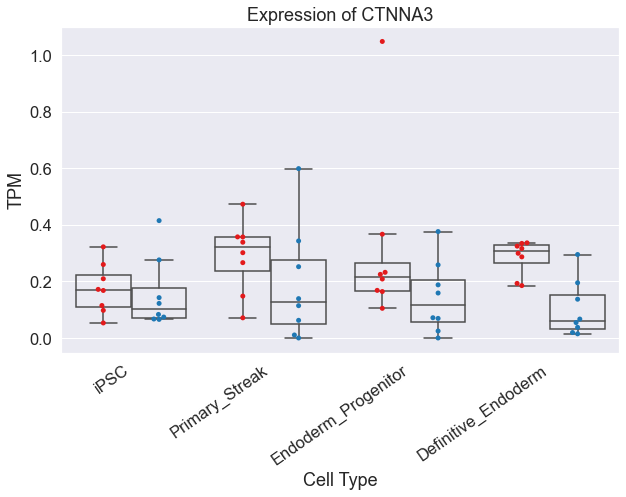

In [161]:
plot_BlaPav2018_tpm("CTNNA3", ks = "STAR")

In [93]:
def table_BlaPav2018(gene, cells = ["iPSC", "Primary_Streak", "Endoderm_Progenitor", "Definitive_Endoderm"], ks = "STAR"):
    folder = "Blake_Pavlovic_2018/" + ks
    if ks == "STAR":
        skel = "Blake_Pavlovic_2018_DESeq2_HumChp_iPSC.txt"
    else:
        skel = "Blake_Pavlovic_2018_Kallisto_DESeq2_HumChp_iPSC.txt"
    output = []
    for t in cells:
        de = folder + "/" + skel.replace("iPSC", t)
        output = read_de(de, gene, output, "HumChp")
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = cells
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [94]:
table_BlaPav2018("EDN1")

EDN1 DESeq2 Information

                    Comparison  log2FoldChange       p-value       FDR
iPSC                    HumChp        0.414218  2.396946e-01  0.461622
Primary_Streak          HumChp       -1.703544  2.489099e-07  0.000002
Endoderm_Progenitor     HumChp        0.496521  1.883830e-01  0.375224
Definitive_Endoderm     HumChp        1.236702  1.134917e-03  0.004539


In [62]:
def plot_JoJa2021_tpm(gene, days = ["Day13", "Day14", "Day15", "Day16"], ks = "STAR"):
    folder = "Johansson_Jakobsson_2021/" + ks
    if ks == "STAR":
        skel = "Johansson_Jakobsson_2021_DESeq2_HumChp.txt_tpm.txt"
    else:
        skel = "Johansson_Jakobsson_2021_Kallisto_DESeq2_HumChp_Kallisto_tpm.txt"
    output = []
    tpm = pd.read_csv(folder + "/" + skel, sep = "\t")
    tpm_gene = tpm.loc[gene]
    for index in tpm_gene.index:
        d = index.split("_")[4]
        if "Human" in index and d in days:
            output.append([tpm_gene[index], "Human", d])
        elif "Chimp" in index and d in days:
            output.append([tpm_gene[index], "Chimp", d])
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Day"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Day", y="TPM", hue = "Species", data=df, dodge = True, order = days, palette = palette)
    ax = sns.boxplot(x="Day", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = days)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Day")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of AMH'}, xlabel='Day', ylabel='TPM'>

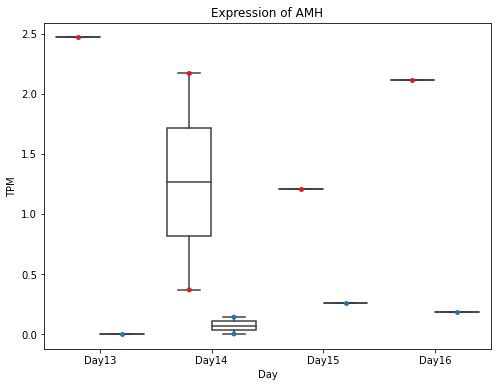

In [63]:
plot_JoJa2021_tpm("AMH", ks = "Kallisto")

In [97]:
def table_JoJa2021(gene, cells = ["Neural Progenitor Cell"], ks = "STAR"):
    folder = "Johansson_Jakobsson_2021/" + ks
    if ks == "STAR":
        skel = "Johansson_Jakobsson_2021_DESeq2_HumChp.txt"
    else:
        skel = "Johansson_Jakobsson_2021_Kallisto_DESeq2_HumChp.txt"
    output = []
    for t in cells:
        de = folder + "/" + skel
        output = read_de(de, gene, output, "HumChp")
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = cells
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [98]:
table_JoJa2021("ZNF558")

ZNF558 DESeq2 Information

                       Comparison  log2FoldChange       p-value           FDR
Neural Progenitor Cell     HumChp        9.084309  6.723536e-91  3.971256e-88


In [4]:
def plot_LanOrg2021_tpm(gene, times = ["D0", "D2", "D3", "D5", "D10", "D15", "D25"], ks = "STAR"):
    folder = "Lancaster_Organoid_2021/" + ks
    if ks == "STAR":
        skel = "Lancaster_Organoid_2021_DESeq2_HumGor_D0_tpm.txt"
    else:
        skel = "Lancaster_Organoid_2021_Kallisto_DESeq2_HumGor_D0_Kallisto_tpm.txt"
    output = []
    for t in times:
        file = folder + "/" + skel.replace("D0", t)
        output = read_file(file, output, gene, t, species = "Gorilla", h = True)
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Time After Induction"]
    ax = sns.swarmplot(x="Time After Induction", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Time After Induction", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = times)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Time After Induction")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of MDH2'}, xlabel='Time After Induction', ylabel='TPM'>

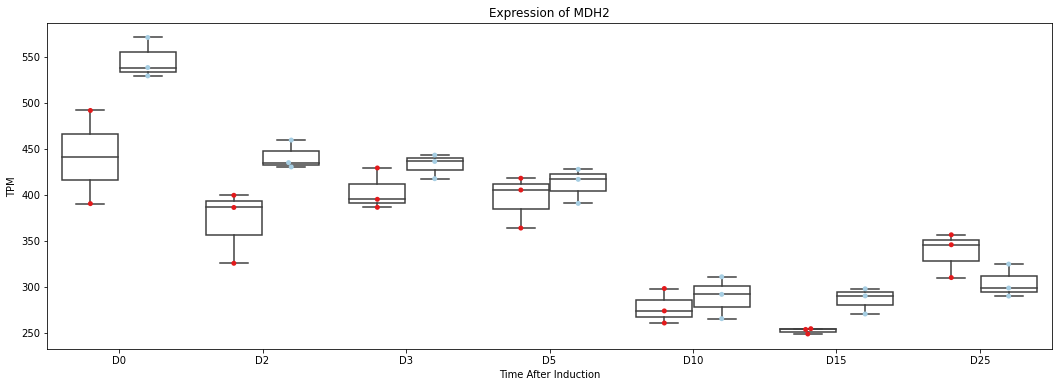

In [48]:
plot_LanOrg2021_tpm("MDH2", ks = "STAR")

In [226]:
def table_LanOrg2021(gene, times = ["D0", "D2", "D3", "D5", "D10", "D15", "D25"], ks = "STAR"):
    folder = "Lancaster_Organoid_2021/" + ks
    if ks == "STAR":
        skel = "Lancaster_Organoid_2021_DESeq2_HumGor_D0.txt"
    else:
        skel = "Lancaster_Organoid_2021_Kallisto_DESeq2_HumGor_D0.txt"
    output = []
    for t in times:
        de = folder + "/" + skel.replace("D0", t)
        output = read_de(de, gene, output, "HumGor")
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = times
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [262]:
table_LanOrg2021("EDN1", ks = "STAR")

EDN1 DESeq2 Information

    Comparison  log2FoldChange       p-value           FDR
D0      HumGor        1.274559  8.017730e-03  2.804344e-02
D2      HumGor       -0.190890  6.612847e-01  8.294490e-01
D3      HumGor       -1.798350  1.319626e-06  9.711004e-06
D5      HumGor       -3.056173  6.792334e-32  2.399567e-30
D10     HumGor       -1.365899  1.107552e-03  4.858959e-03
D15     HumGor       -0.918771  3.899223e-02  1.046193e-01
D25     HumGor       -0.264678  5.069753e-01  7.731591e-01


In [49]:
def plot_BraKae2011_tpm(gene, organs = ["Brain", "Cerebellum", "Heart", "Kidney", "Liver"], ks = "STAR"):
    output = []
    folder = "Brawnand_Kaessmann_2011" + "/" + ks
    for t in organs:
        if ks == "STAR":
            skel = "Brawnand_Kaessmann_2011_DESeq2_HumChp_Brain.txt_tpm.txt"
        else:
            skel = "Brawnand_Kaessmann_2011_Kallisto_DESeq2_HumChp_Brain_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Brain", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
        
        if ks == "STAR":
            skel = "Brawnand_Kaessmann_2011_DESeq2_HumRhe_Brain.txt_tpm.txt"
        else:
            skel = "Brawnand_Kaessmann_2011_Kallisto_DESeq2_HumRhe_Brain_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Brain", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
        if ks == "STAR":
            skel = "Brawnand_Kaessmann_2011_DESeq2_HumOrg_Brain.txt_tpm.txt"
        else:
            skel = "Brawnand_Kaessmann_2011_Kallisto_DESeq2_HumOrg_Brain_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Brain", t)
        output = read_file(file, output, gene, t, species = "Orangutan", h = False)
        if ks == "STAR":
            skel = "Brawnand_Kaessmann_2011_DESeq2_HumBon_Brain.txt_tpm.txt"
        else:
            skel = "Brawnand_Kaessmann_2011_Kallisto_DESeq2_HumBon_Brain_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Brain", t)
        output = read_file(file, output, gene, t, species = "Bonobo", h = False)
        if ks == "STAR":
            skel = "Brawnand_Kaessmann_2011_DESeq2_HumGor_Brain.txt_tpm.txt"
        else:
            skel = "Brawnand_Kaessmann_2011_Kallisto_DESeq2_HumGor_Brain_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Brain", t)
        output = read_file(file, output, gene, t, species = "Gorilla", h = False)
        if ks == "STAR":
            skel = "Brawnand_Kaessmann_2011_DESeq2_HumMou_Brain.txt_tpm.txt"
        else:
            skel = "Brawnand_Kaessmann_2011_Kallisto_DESeq2_HumMou_Brain_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Brain", t)
        try:
            output = read_file(file, output, gene, t, species = "Mouse", h = False)
        except:
            pass
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Organ")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of CD38'}, xlabel='Organ', ylabel='TPM'>

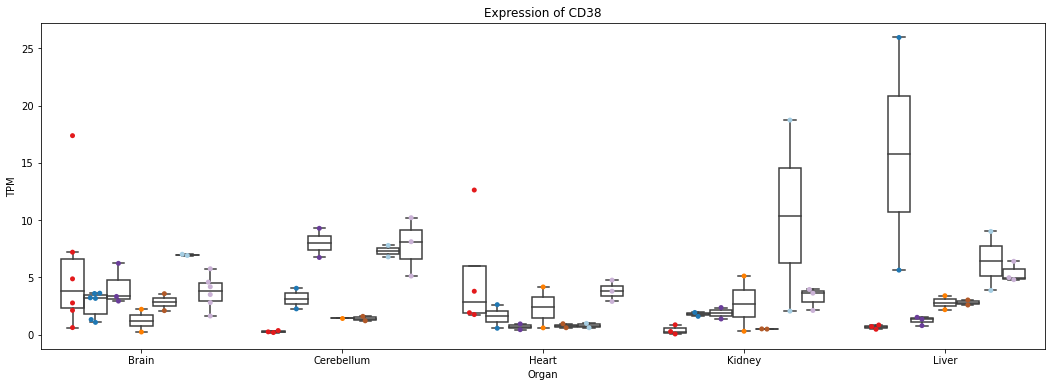

In [50]:
plot_BraKae2011_tpm("CD38", ks = "Kallisto")

In [103]:
def table_BraKae2011(gene, organs = ["Brain", "Cerebellum", "Heart", "Kidney", "Liver"], ks = "STAR"):
    ind = []
    folder = "Brawnand_Kaessmann_2011/" + ks
    if ks == "STAR":
        skel = "Brawnand_Kaessmann_2011_DESeq2_HumChp_Brain.txt"
    else:
        skel = "Brawnand_Kaessmann_2011_Kallisto_DESeq2_HumChp_Brain.txt"
    output = []
    for t in organs:
        de = folder + "/" + skel.replace("Brain", t)
        de2 = folder + "/" + skel.replace("Brain", t).replace("Chp", "Rhe")
        de3 = folder + "/" + skel.replace("Brain", t).replace("Chp", "Org")
        de4 = folder + "/" + skel.replace("Brain", t).replace("Chp", "Gor")
        de5 = folder + "/" + skel.replace("Brain", t).replace("Chp", "Bon")
        de6 = folder + "/" + skel.replace("Brain", t).replace("Chp", "Mou")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        output = read_de(de3, gene, output, "HumOrg")
        output = read_de(de4, gene, output, "HumGor")
        output = read_de(de5, gene, output, "HumBon")
        try:
            output = read_de(de6, gene, output, "HumMou")
            ind = ind + [t, t, t, t, t, t]
        except:
            ind = ind + [t, t, t, t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [104]:
table_BraKae2011('ZNF558', ks = "Kallisto")

ZNF558 DESeq2 Information

           Comparison  log2FoldChange   p-value       FDR
Brain          HumChp        0.131251  0.613525  0.989700
Brain          HumRhe       -0.281902  0.352564  0.886755
Brain          HumOrg       -0.204847  0.567569  0.982110
Brain          HumGor        0.045753  0.866136  1.000000
Brain          HumBon        0.004380  0.952543  1.000000
Cerebellum     HumChp        0.317804  0.255004  0.906992
Cerebellum     HumRhe       -0.061923  0.863240  0.962529
Cerebellum     HumOrg       -0.267636  0.521735  0.952636
Cerebellum     HumGor        0.152112  0.639387  1.000000
Cerebellum     HumBon        0.181268  0.475342  1.000000
Heart          HumChp        0.194216  0.581594  1.000000
Heart          HumRhe       -0.159133  0.596909  1.000000
Heart          HumOrg       -0.834429  0.068944  0.574247
Heart          HumGor        0.509608  0.269724  0.802159
Heart          HumBon        0.154842  0.628721  1.000000
Kidney         HumChp       -0.129038  0.4066

In [42]:
def plot_KhaBoz2015_tpm(gene, organs = ["PFC", "CBC", "VC", "kidney", "muscle"], ks = "STAR"):
    output = []
    folder = "Khaitovich_Bozek_2015" + "/" + ks
    for t in organs:
        if ks == "STAR":
            skel = "Khaitovich_Bozek_2015_DESeq2_HumChp_PFC_tpm.txt"
        else:
            skel = "Khaitovich_Bozek_2015_Kallisto_DESeq2_HumChp_PFC_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("PFC", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
        
        if ks == "STAR":
            skel = "Khaitovich_Bozek_2015_DESeq2_HumRhe_PFC_tpm.txt"
        else:
            skel = "Khaitovich_Bozek_2015_Kallisto_DESeq2_HumRhe_PFC_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("PFC", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
        if ks == "STAR":
            skel = "Khaitovich_Bozek_2015_DESeq2_HumMou_PFC_tpm.txt"
        else:
            skel = "Khaitovich_Bozek_2015_Kallisto_DESeq2_HumMou_PFC_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("PFC", t)
        try:
            output = read_file(file, output, gene, t, species = "Mouse", h = False)
        except:
            pass
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Organ")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of CACNA1B'}, xlabel='Organ', ylabel='TPM'>

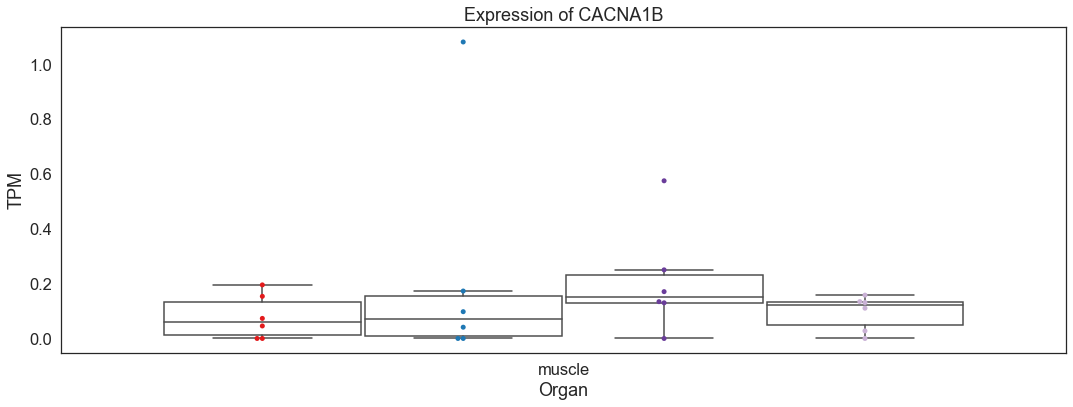

In [43]:
plot_KhaBoz2015_tpm("CACNA1B", ks = "STAR", organs = ["muscle"])

In [22]:
def table_KhaBoz2015(gene, organs = ["PFC", "CBC", "VC", "kidney", "muscle"], ks = "STAR"):
    ind = []
    folder = "Khaitovich_Bozek_2015/" + ks
    if ks == "STAR":
        skel = "Khaitovich_Bozek_2015_DESeq2_HumChp_PFC.txt"
    else:
        skel = "Khaitovich_Bozek_2015_Kallisto_DESeq2_HumChp_PFC.txt"
    output = []
    for t in organs:
        de = folder + "/" + skel.replace("PFC", t)
        de2 = folder + "/" + skel.replace("PFC", t).replace("Chp", "Rhe")
        de3 = folder + "/" + skel.replace("PFC", t).replace("Chp", "Mou")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        try:
            output = read_de(de3, gene, output, "HumMou")
            ind = ind + [t, t, t]
        except:
            ind = ind + [t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [24]:
table_KhaBoz2015('ACTN3', ks = "Kallisto", organs = ["muscle"])

ACTN3 DESeq2 Information

       Comparison  log2FoldChange   p-value       FDR
muscle     HumChp        -0.43268  0.230572  0.574807
muscle     HumRhe        -0.14738  0.727767  0.990511
muscle     HumMou        -3.14583  0.000020  0.000078


In [162]:
def plot_CasCre2020_tpm(gene, organs = ["White_Matter"], ks = "STAR"):
    output = []
    folder = "Castelijns_Creyghton_2020" + "/" + ks
    for t in organs:
        if ks == "STAR":
            skel = "Castelijns_Creyghton_2020_DESeq2_HumChp_tpm.txt"
        else:
            skel = "Castelijns_Creyghton_2020_Kallisto_DESeq2_HumChp_Kallisto_tpm.txt"
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
        
        if ks == "STAR":
            skel = "Castelijns_Creyghton_2020_DESeq2_HumRhe_tpm.txt"
        else:
            skel = "Castelijns_Creyghton_2020_Kallisto_DESeq2_HumRhe_Kallisto_tpm.txt"
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
        if ks == "STAR":
            skel = "Castelijns_Creyghton_2020_DESeq2_HumMar_tpm.txt"
        else:
            skel = "Castelijns_Creyghton_2020_Kallisto_DESeq2_HumMar_Kallisto_tpm.txt"
        file = folder + "/" + skel
        try:
            output = read_file(file, output, gene, t, species = "Marmoset", h = False)
        except:
            pass
    fig, ax = plt.subplots(figsize=(8,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Organ")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of PMP2'}, xlabel='Organ', ylabel='TPM'>

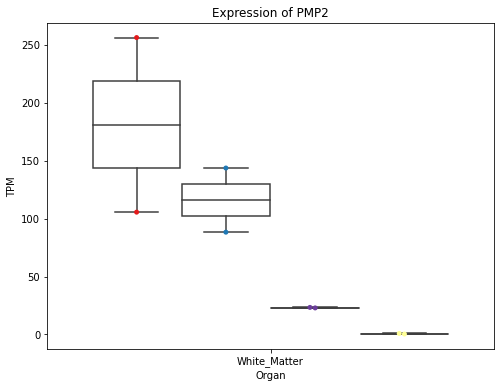

In [165]:
plot_CasCre2020_tpm("PMP2", ks = "Kallisto")

In [168]:
def table_CasCre2015(gene, organs = ["White_Matter"], ks = "STAR"):
    ind = []
    folder = "Castelijns_Creyghton_2020/" + ks
    if ks == "STAR":
        skel = "Castelijns_Creyghton_2020_DESeq2_HumChp.txt"
    else:
        skel = "Castelijns_Creyghton_2020_Kallisto_DESeq2_HumChp_Kallisto.txt"
    output = []
    for t in organs:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Chp", "Rhe")
        de3 = folder + "/" + skel.replace("Chp", "Mar")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        try:
            output = read_de(de3, gene, output, "HumMar")
            ind = ind + [t, t, t]
        except:
            ind = ind + [t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [169]:
table_CasCre2015("PMP2")

PMP2 DESeq2 Information

             Comparison  log2FoldChange       p-value           FDR
White_Matter     HumChp        0.271031  5.122793e-01  8.392070e-01
White_Matter     HumRhe        2.675197  3.863491e-06  5.698662e-05
White_Matter     HumMar        8.805111  2.421701e-15  1.870261e-13


In [188]:
def plot_HeKha2017_tpm(gene, regions = ["L1", "L2", "L2_3", "L3", "L4", "L4_5", "L5", "L6_WM"], ks = "STAR"):
    output = []
    folder = "He_Khaitovich_2017" + "/" + ks
    for t in regions:
        if ks == "STAR":
            skel = "He_Khaitovich_2017_DESeq2_HumChp_L1_tpm.txt"
        else:
            skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumChp_L1_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("L1", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
        
        if ks == "STAR":
            skel = "He_Khaitovich_2017_DESeq2_HumRhe_L1_tpm.txt"
        else:
            skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumRhe_L1_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("L1", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Layer"]
    ax = sns.swarmplot(x="Layer", y="TPM", hue = "Species", data=df, dodge = True, order = regions, palette = palette)
    ax = sns.boxplot(x="Layer", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = regions)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Layer")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of CD38'}, xlabel='Layer', ylabel='TPM'>

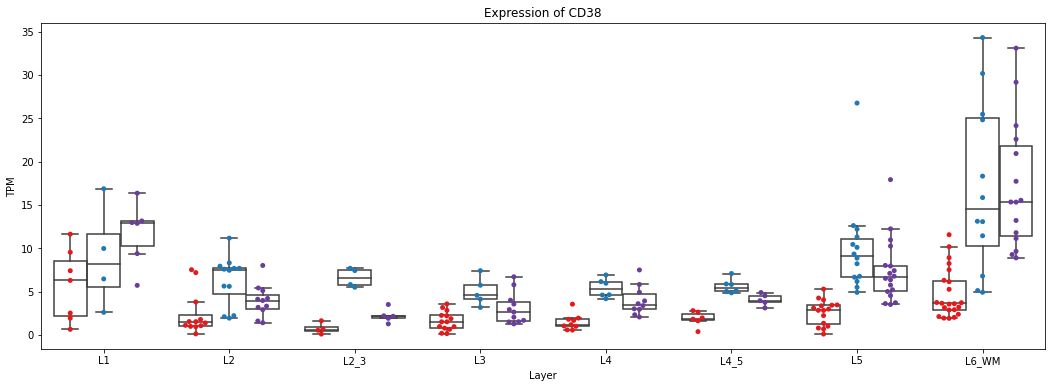

In [394]:
plot_HeKha2017_tpm("CD38", ks = "Kallisto")

In [190]:
def table_HeKha2017(gene, regions = ["L1", "L2", "L2_3", "L3", "L4", "L4_5", "L5", "L6_WM"], ks = "STAR"):
    ind = []
    folder = "He_Khaitovich_2017/" + ks
    if ks == "STAR":
        skel = "He_Khaitovich_2017_DESeq2_HumChp_L1.txt"
    else:
        skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumChp_L1.txt"
    output = []
    for t in regions:
        de = folder + "/" + skel.replace("L1", t)
        de2 = folder + "/" + skel.replace("L1", t).replace("Chp", "Rhe")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        ind = ind + [t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [404]:
table_HeKha2017("BST1", ks = "Kallisto")

BST1 DESeq2 Information

      Comparison  log2FoldChange       p-value           FDR
L1        HumChp       -3.343444  8.547972e-08  1.257816e-05
L1        HumRhe       -3.942447  2.598463e-07  9.153876e-06
L2        HumChp       -3.528977  1.635343e-12  9.133964e-11
L2        HumRhe       -4.579803  1.015971e-29  5.088897e-28
L2_3      HumChp       -2.698329  1.888525e-05  2.286845e-04
L2_3      HumRhe       -4.366014  7.964450e-21  3.910016e-19
L3        HumChp       -2.494615  3.665723e-08  1.438660e-06
L3        HumRhe       -4.415636  1.520516e-46  1.819434e-44
L4        HumChp       -2.258190  2.118462e-05  3.390249e-04
L4        HumRhe       -4.119764  3.145423e-33  2.985077e-31
L4_5      HumChp       -4.105612  6.139499e-09  2.942688e-07
L4_5      HumRhe       -4.379130  3.196683e-12  4.591303e-11
L5        HumChp       -3.386755  4.360449e-14  2.030225e-12
L5        HumRhe       -4.325114  3.195634e-85  6.315250e-83
L6_WM     HumChp       -3.108355  9.945085e-14  5.197900e-12

In [45]:
def plot_MoiKae2019_TPM(gene, tissue = "Forebrain", species = "Mouse", ks = "STAR"):
    if species == "Human":
        timepoints = ["W4", "W5", "W7", "W8", "W9", "W10", "W11", "W12", "W13", "W16", "W18", "W19", "W20", "D4", "D15", "D19", "D221", "D271", "Y2", "Y4", "Y7", "Y8", "Y13", "Y14", "Y16", "Y17", "Y28", "Y29", "Y39", "Y53", "Y58"]
        if ks == "STAR":
            file = "Moreira_Kaessmann_2019_DESeq2_Hum_Forebrain.txt_tpm.txt".replace("Forebrain", tissue)
        else:
            file = "Moreira_Kaessmann_2019_Kallisto_DESeq2_Hum_Forebrain_Kallisto_tpm.txt".replace("Forebrain", tissue)
        tpm = pd.read_csv('Moreira_Kaessmann_2019/' + ks + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        output = []
        for index in tpm_gene.index:
            t = index.split("_")[2]
            if t in timepoints:
                output.append([tpm_gene[index], "Human", t])
    elif species == "Rhesus":
        timepoints = ["E93", "E109", "E112", "E123", "E130", "Y0", "Y1", "Y2", "Y3", "Y6", "Y9", "Y14", "Y20", "Y22", "Y24"]
        if ks == "STAR":
            file = "Moreira_Kaessmann_2019_DESeq2_Rhe_Forebrain.txt_tpm.txt".replace("Forebrain" ,tissue)
        elif ks == "Kallisto":
            file = "Moreira_Kaessmann_2019_Kallisto_DESeq2_Rhe_Forebrain_Kallisto_tpm.txt".replace("Forebrain" ,tissue)
        tpm = pd.read_csv('Moreira_Kaessmann_2019/' + ks + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        output = []
        for index in tpm_gene.index:
            t = index.split("_")[3]
            if t in timepoints:
                output.append([tpm_gene[index], "Rhesus", t])
    elif species == "Mouse":
        timepoints = ["10.5", "11.5", "12.5", "13.5", "14.5", "15.5", "16.5", "17.5", "18.5", "0", "3", "14", "28", "63"]        
        if ks == "STAR":
            file = "Moreira_Kaessmann_2019_DESeq2_Mou_Forebrain.txt_tpm.txt".replace("Forebrain" ,tissue)
        elif ks == "Kallisto":
            file = "Moreira_Kaessmann_2011_Kallisto_DESeq2_Mou_Forebrain_Kallisto_tpm.txt".replace("Forebrain" ,tissue)
        tpm = pd.read_csv('Moreira_Kaessmann_2019/' + ks + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        output = []
        for index in tpm_gene.index:
            t = index.split("_")[2]
            if t in timepoints:
                output.append([tpm_gene[index], "Mouse", t])
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Timepoint"]
    ax = sns.swarmplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = timepoints, palette = palette)
    #ax = sns.boxplot(x="Tim", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = regions)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Timepoint")
    ax.set_title("Expression of " + gene)
    return ax

C:\Users\astar\anaconda3\lib\site-packages\seaborn\categorical.py:1388: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\astar\anaconda3\lib\site-packages\seaborn\categorical.py:1388: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


<AxesSubplot:title={'center':'Expression of CACNA1B'}, xlabel='Timepoint', ylabel='TPM'>

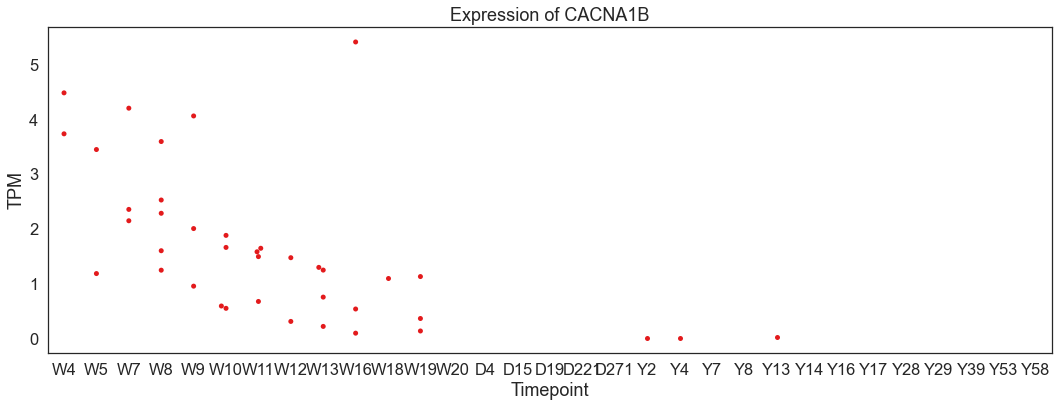

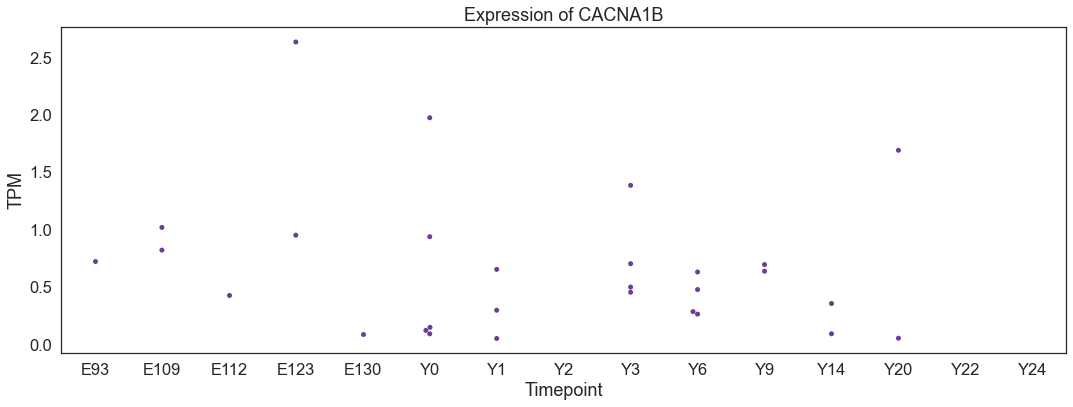

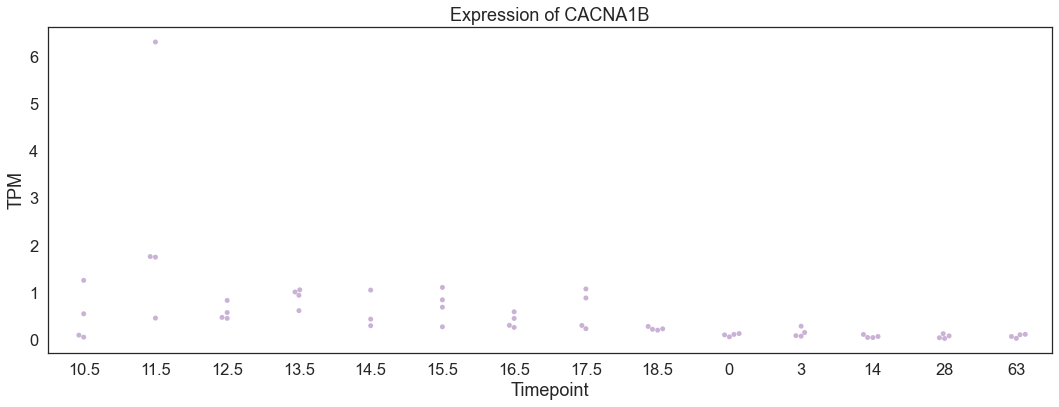

In [48]:
plot_MoiKae2019_TPM("CACNA1B", tissue = "Heart", ks = "STAR", species = "Human")
plot_MoiKae2019_TPM("CACNA1B", tissue = "Heart", ks = "STAR", species = "Rhesus")
plot_MoiKae2019_TPM("CACNA1B", tissue = "Heart", ks = "STAR", species = "Mouse")

<AxesSubplot:title={'center':'Expression of PTBP1'}, xlabel='Timepoint', ylabel='TPM'>

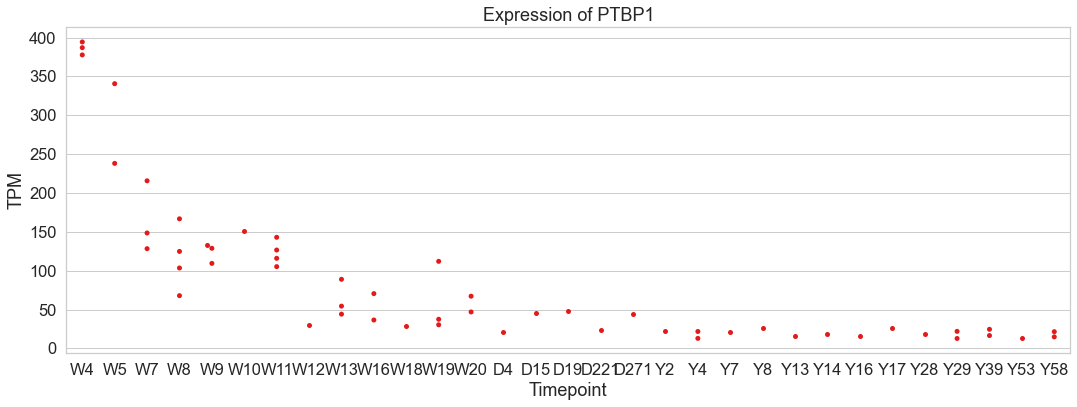

In [76]:
#plot_MoiKae2019_TPM("ELAVL1", tissue = "Forebrain", ks = "STAR", species = "Mouse")
plot_MoiKae2019_TPM("PTBP1", tissue = "Forebrain", ks = "STAR", species = "Human")

In [6]:
#Possible regions are A1C, AMY, CBC, DFC, HIP, IPC, ITC, M1C, MD, MFC, OFC, S1C, STC, STR, V1C, VFC, All_Cortical
#Note that for macaque we give the predicted age in human years based on their model
def plotBraSpa_tpm(gene, region = "All_Cortical", species = "Human", ks = "STAR", tt = False):
    convert_age = pd.read_csv("BrainSpan/Metadata_rhe.csv")
    d = {}
    for index, row in convert_age.iterrows():
        d[row[1]] = row[0]
    if species == "Human":
        timepoints = ["8PCW", "9PCW", "12PCW", "13PCW", "16PCW", "17PCW", "19PCW", "21PCW", "22PCW", "35PCW", "37PCW", "4M", "6M", "301days", "12M", "2Y", "2Y178d", "2Y305d", "4Y", "8Y", "8Y90d", "10Y265d", "13Y", "15Y", "18Y", "19Y", "21Y", "23Y", "30Y", "36Y", "37Y", "40Y"]
        if ks == "STAR":
            file = "BrainSpan_DESeq2_Hum_DFC.txt_tpm.txt".replace("DFC", region)
        else:
            file = "BrainSpan_Kallisto_DESeq2_Hum_DFC_Kallisto_tpm.txt".replace("DFC", region)
        tpm = pd.read_csv('BrainSpan/' + ks + "/" + file, sep = "\t")
        if ks == "Kallisto":
            tpm = tpm.set_index("Unnamed: 0")
        if ks == "STAR":
            tpm = tpm.set_index("Unnamed: 0")
        tpm_gene = tpm.loc[gene]
        output = []
        for index in tpm_gene.index:
            t = index.split("_")[3]
            if t in timepoints:
                output.append([tpm_gene[index], "Human", t])
    if species == "Rhesus":
        timepoints = ["PCW15", "PCW16", "PCW17", "PCW18", "PCW20", "PCW24", "PCW26", "PCW27", "PCW36", "0.25", "0.75", "1.65", "1.75", "1.95", "2.65", "13.05", "13.85", "14.45", "15.75", "16.05", "16.45", "20.05", "21.05", "21.35", "22.65"]
        orde = ["E60", "E80", "E81", "E82", "E110", "E111", "P0", "P2", "7M", "1Y", "2Y", "3.5Y", "4Y", "5Y", "7Y", "11Y"]
        if ks == "STAR":
            file = "BrainSpan_DESeq2_Rhe_DFC.txt_tpm.txt".replace("DFC", region)
        else:
            file = "BrainSpan_Kallisto_DESeq2_Rhe_DFC_Kallisto_tpm.txt".replace("DFC", region)
        tpm = pd.read_csv('BrainSpan/' + ks + "/" + file, sep = "\t", header = None)
        if ks == "Kallisto":
            tpm.columns = tpm.loc[0]
            tpm = tpm.drop(0, axis = 0)
            tpm = tpm.set_index(float("nan"))
        if ks == "STAR":
            tpm.columns = tpm.loc[0]
            tpm = tpm.drop(0, axis = 0)
            tpm = tpm.set_index("Unnamed: 0")
        tpm_gene = tpm.loc[gene]
        output = []
        for index in tpm_gene.index:
            t = index.split("_")[3]
            if t in timepoints:
                if not tt:
                    output.append([tpm_gene[index], "Rhesus", d[t]])
                else:
                    output.append([tpm_gene[index], "Rhesus", t])
    fig, ax = plt.subplots(figsize=(24,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Timepoint"]
    if species == "Rhesus" and not tt:
        ax = sns.stripplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = orde, palette = palette)
    else:
        ax = sns.stripplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = timepoints, palette = palette)
    if region == "All_Cortical":
        if not tt and species == "Rhesus":
            ax = sns.boxplot(x="Timepoint", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = orde)
        else:
            pass
            #ax = sns.boxplot(x="Timepoint", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = timepoints)
    plt.legend([],[], frameon=False)
    plt.xticks(rotation=45, ha = "right")
    ax.set_xlabel("Timepoint")
    ax.set_ylabel("Expression (TPM)")
    ax.set_title("Expression of " + gene + " Across Human Development")
    return ax

<AxesSubplot:title={'center':'Expression of FMR1 Across Early Human Development'}, xlabel='Timepoint', ylabel='Expression (TPM)'>

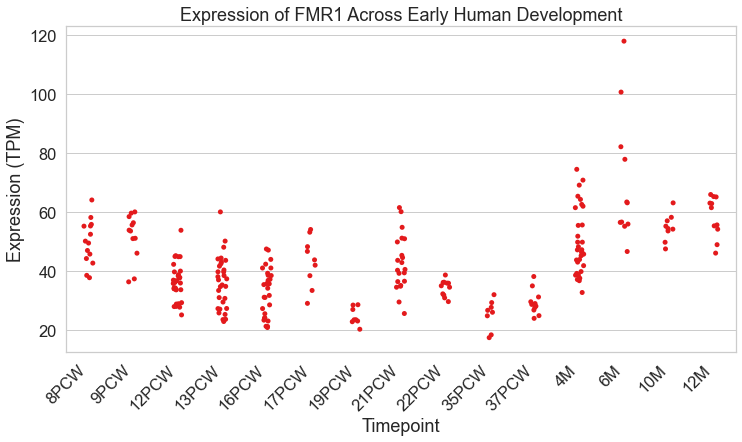

In [54]:
plotBraSpa_tpm("FMR1", ks = "STAR", region = "All_Cortical", species = "Human")
#plotBraSpa_tpm("CORO6", ks = "STAR", region = "All_Cortical", species = "Rhesus")

In [194]:
def plot_KhaBraReg2020_tpm(gene, regions = "Cortical", ks = "STAR", bonobo = False):
    output = []
    cortical_dict = {1:"SPMC", 2:"A2C", 3:'PCC', 4:"PostCC", 5:"PMC", 6:"S1C", 7:"A1C", 8:"M1C", 9:"V1C", 10:"V2C", 11:"AnCC_24", 12:"AnCC_32", 13:"PFC", 14:"ITC", 15:"IPC", 16:"DLPFC", 17:"OFC", 18:"VLPFC"}
    non_cortical_dict = {19:"AMY", 20:"ERC", 21:"HIP", 22:"Hypo", 23:"Thal", 24:"AntCorCal", 25:"PostCorCal", 26:"IntCaps", 27:"GlobPal", 28:"CbWM", 29:"SN", 30:"CbGM", 31:"Put", 32:"Caud", 33:"Nacc"}
    folder = "Khaitovich_Brain_Regions" + "/" + ks
    orde = []
    if regions == "Cortical":
        for key in cortical_dict.keys():
            t = cortical_dict[key]
            if t not in orde:
                orde.append(t)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumChp_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumChp_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Chimp", h = True)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumRhe_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumRhe_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Rhesus", h = False)
            if bonobo:
                if ks == "STAR":
                    skel = "He_Khaitovich_2017_DESeq2_HumBon_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
                else:
                    skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumBon_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
                file = folder + "/" + skel
                output = read_file_h(file, output, gene, t, species = "Bonobo", h = False)
    else:
        for key in non_cortical_dict.keys():
            t = non_cortical_dict[key]
            if t not in orde:
                orde.append(t)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumChp_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumChp_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Chimp", h = True)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumRhe_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumRhe_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Rhesus", h = False)
            if bonobo:
                if ks == "STAR":
                    skel = "He_Khaitovich_2017_DESeq2_HumBon_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
                else:
                    skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumBon_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
                file = folder + "/" + skel
                output = read_file_h(file, output, gene, t, species = "Bonobo", h = False)
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Region"]
    ax = sns.swarmplot(x="Region", y="TPM", hue = "Species", data=df, dodge = True, order = orde, palette = palette)
    ax = sns.boxplot(x="Region", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = orde)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Region")
    ax.set_title("Expression of " + gene)
    plt.xticks(rotation=45, ha = "right")
    return ax

<AxesSubplot:title={'center':'Expression of KCNA1'}, xlabel='Region', ylabel='TPM'>

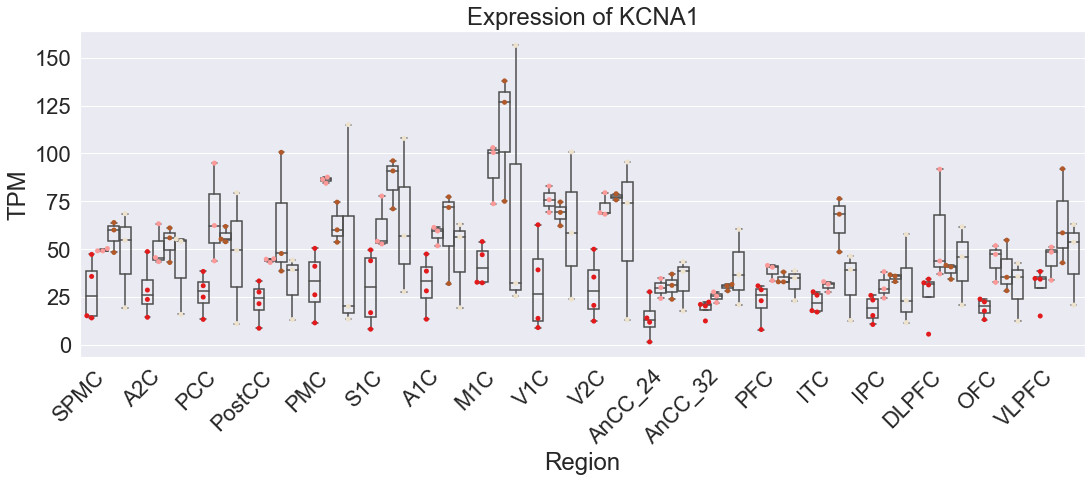

In [195]:
plot_KhaBraReg2020_tpm("KCNA1", regions = "Cortical", bonobo = "False", ks = "STAR")

In [478]:
def table_KhaBraReg2020(gene, regions = "Cortical", ks = "STAR", bonobo = False):
    ind = []
    cortical_dict = {1:"SPMC", 2:"A2C", 3:'PCC', 4:"PostCC", 5:"PMC", 6:"S1C", 7:"A1C", 8:"M1C", 9:"V1C", 10:"V2C", 11:"AntCC_BA24", 12:"AntCC_BA32", 13:"PFC", 14:"ITC", 15:"IPC", 16:"DLPFC", 17:"OFC", 18:"VLPFC"}
    non_cortical_dict = {19:"AMY", 20:"ERC", 21:"HIP", 22:"Hypo", 23:"Thal", 24:"AntCorCal", 25:"PostCorCal", 26:"IntCaps", 27:"GlobPal", 28:"CbWM", 29:"SN", 30:"CbGM", 31:"Put", 32:"Caud", 33:"Nacc"}
    folder = "Khaitovich_Brain_Regions/" + ks
    if ks == "STAR":
        skel = "He_Khaitovich_2017_DESeq2_HumChp_1.txt"
    else:
        skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumChp_1.txt"
    output = []
    if regions == "Cortical":
        for key in cortical_dict.keys():
            t = cortical_dict[key]
            de = folder + "/" + skel.replace("_1", "_" + str(key))
            de2 = folder + "/" + skel.replace("_1", "_" + str(key)).replace("Chp", "Rhe")
            de3 = folder + "/" + skel.replace("_1", "_" + str(key)).replace("Chp", "Bon")
            output = read_de(de, gene, output, "HumChp")
            output = read_de(de2, gene, output, "HumRhe")
            output = read_de(de3, gene, output, "HumBon")
            ind = ind + [t, t, t]
    else:
        for key in non_cortical_dict.keys():
            t = non_cortical_dict[key]
            de = folder + "/" + skel.replace("_1", "_" + str(key))
            de2 = folder + "/" + skel.replace("_1", "_" + str(key)).replace("Chp", "Rhe")
            de3 = folder + "/" + skel.replace("_1", "_" + str(key)).replace("Chp", "Bon")
            output = read_de(de, gene, output, "HumChp")
            output = read_de(de2, gene, output, "HumRhe")
            output = read_de(de3, gene, output, "HumBon")
            ind = ind + [t, t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)


In [483]:
table_KhaBraReg2020("OXTR", regions = "Non-Cortical", ks = "Kallisto")

OXTR DESeq2 Information

           Comparison  log2FoldChange       p-value       FDR
AMY            HumChp         1.57552  2.017184e-03  0.046101
AMY            HumRhe         0.62457  5.403596e-02  0.554822
AMY            HumBon        -0.00000  7.130104e-01  1.000000
ERC            HumChp         0.48266  9.247597e-02  0.598051
ERC            HumRhe         0.99198  3.245011e-02  0.242287
ERC            HumBon         0.00000  2.603033e-01  1.000000
HIP            HumChp         0.78422  4.632540e-02  0.237317
HIP            HumRhe         1.02807  2.911185e-02  0.151684
HIP            HumBon         0.15521  1.087226e-01  1.000000
Hypo           HumChp         0.07728  7.935682e-01  1.000000
Hypo           HumRhe         1.02113  3.644603e-02  0.199301
Hypo           HumBon         0.01542  7.728771e-01  1.000000
Thal           HumChp         1.66196  1.653263e-03  0.024548
Thal           HumRhe         2.51506  6.008705e-04  0.007953
Thal           HumBon         0.20022  1.4164

In [129]:
def plot_HeLiuKha201416_tpm(gene, ks = "STAR", species = "Human_ctrl"):
    output = []
    folder = "He_Liu_Khaitovich_201416"
    if species == "Human_ctrl":
        timepoints = [0.0, 0.1, 0.3, 0.6, 1.2, 1.3, 2.2, 2.8, 4.0, 4.7, 4.8, 7.7, 8.0, 8.6, 10.7, 11.8, 14.0, 15.3, 17.0, 19.0, 20.2, 20.6, 22.9, 24.0, 27.1, 30.0, 36.0, 39.0, 41.7, 50.0, 53.3, 56.0, 61.5]
        if ks == "STAR":
            file = "He_Liu_Khaitovich_201416_DESeq2_Human_Ctrl_tpm.txt"
        else:
            file = "BrainSpan_Kallisto_DESeq2_Hum_DFC_Kallisto_tpm.txt".replace("DFC", region)
        folder = folder + "/" + ks
        tpm = pd.read_csv(folder + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        for index in tpm_gene.index:
            t = index.split("_")[3]
            output.append([tpm_gene[index], "Human_ctrl", float(t)])
    elif species == "Human_aut":
        timepoints = [2.0, 4.5, 5.0, 5.6, 7.2, 7.8, 8.0, 8.8, 9.0, 10.0, 11.0, 14.3, 15.0, 18.0, 19.0, 20.0, 20.8, 22.0, 24.0, 27.0, 29.0, 30.0, 39.0, 49.0, 50.0, 52.0, 60.0]
        if ks == "STAR":
            file = "He_Liu_Khaitovich_201416_DESeq2_Human_Aut_tpm.txt"
        else:
            file = "BrainSpan_Kallisto_DESeq2_Hum_DFC_Kallisto_tpm.txt".replace("DFC", region)
        folder = folder + "/" + ks
        tpm = pd.read_csv(folder + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        for index in tpm_gene.index:
            t = index.split("_")[2]
            output.append([tpm_gene[index], "Human_aut", float(t)])
    elif species == "Chimp":
        timepoints = [0.0, 0.1, 1.4, 6.3, 10.4, 10.9, 12.1, 16.6, 16.8, 17.8, 18.0, 18.5, 20.2, 20.5, 21.3, 21.4, 21.5, 22.7, 23.9, 24.1, 25.5, 26.4, 27.1, 28.9, 29.0, 30.8, 31.2, 32.4, 34.5, 35.0, 39.9, 42.6]
        if ks == "STAR":
            file = "He_Liu_Khaitovich_201416_DESeq2_Chimp_tpm.txt"
        else:
            file = "BrainSpan_Kallisto_DESeq2_Hum_DFC_Kallisto_tpm.txt".replace("DFC", region)
        folder = folder + "/" + ks
        tpm = pd.read_csv(folder + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        for index in tpm_gene.index:
            t = index.split("_")[1]
            output.append([tpm_gene[index], "Chimp", float(t)])
    elif species == "Rhesus":
        timepoints = [-0.2, -0.1, 0.0, 0.1, 0.4, 0.5, 0.6, 0.8, 1.0, 1.2, 1.5, 1.7, 1.8, 2.0, 2.3, 3.1, 3.2, 3.3, 4.1, 6.5, 7.0, 8.0, 9.1, 9.3, 10.9, 11.9, 13.0, 14.1, 15.0]
        if ks == "STAR":
            file = "He_Liu_Khaitovich_201416_DESeq2_Rhesus_tpm.txt"
        else:
            file = "BrainSpan_Kallisto_DESeq2_Hum_DFC_Kallisto_tpm.txt".replace("DFC", region)
        folder = folder + "/" + ks
        tpm = pd.read_csv(folder + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        l = []
        for index in tpm_gene.index:
            t = index.split("_")[2]
            output.append([tpm_gene[index], "Rhesus", float(t)])
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Timepoint"]
    ax = sns.swarmplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = timepoints, palette = palette)
    #ax = sns.boxplot(x="Tim", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = regions)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Timepoint")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of KCNA1'}, xlabel='Timepoint', ylabel='TPM'>

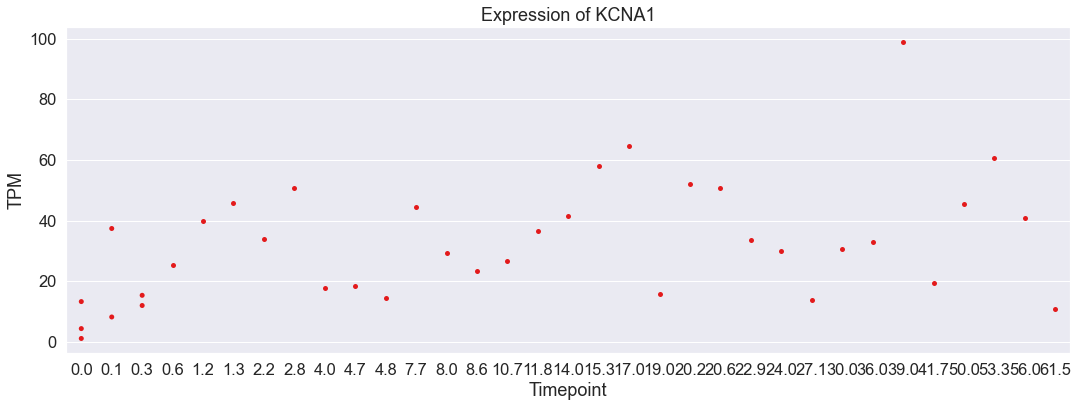

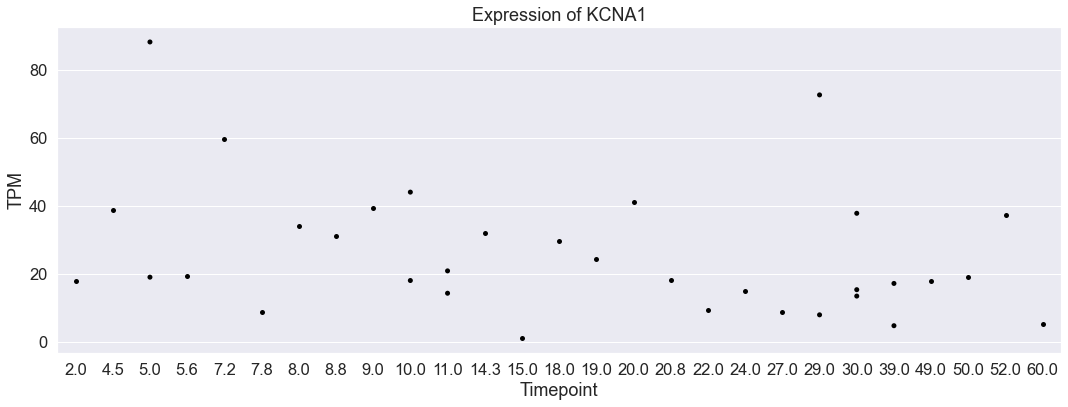

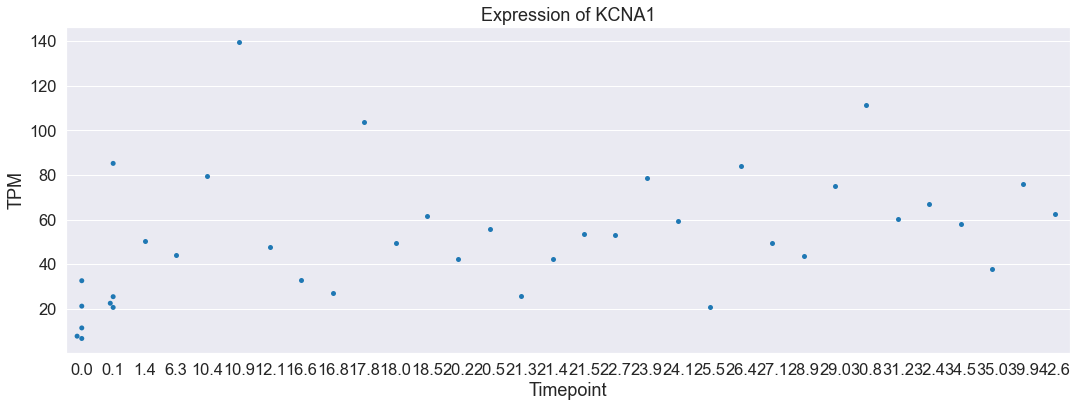

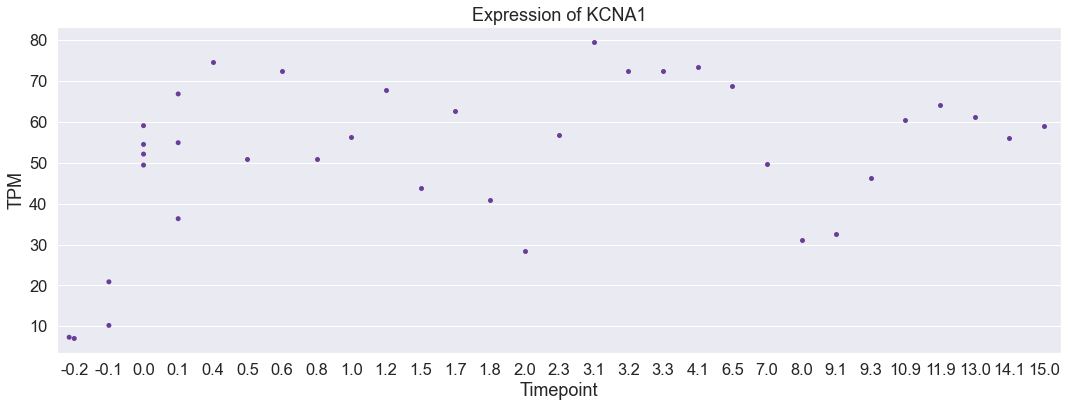

In [130]:
plot_HeLiuKha201416_tpm("KCNA1", species = "Human_ctrl")
plot_HeLiuKha201416_tpm("KCNA1", species = "Human_aut")
plot_HeLiuKha201416_tpm("KCNA1", species = "Chimp")
plot_HeLiuKha201416_tpm("KCNA1", species = "Rhesus")

In [37]:
def plot_KhaGil2013_tpm(gene, cell_types = ["LCL"], ks = "STAR"):
    folder = "Khan_Gilad_2013/" + ks
    if ks == "STAR":
        skel = "Khan_Gilad_2013_DESeq2_HumChp_LCL_tpm.txt"
    else:
        skel = "Khan_Gilad_2013_Kallisto_DESeq2_HumChp_LCL_Kallisto_tpm.txt"
    output = []
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Khan_Gilad_2013_DESeq2_HumRhe_LCL_tpm.txt"
    else:
        skel = "Khan_Gilad_2013_Kallisto_DESeq2_HumRhe_LCL_Kallisto_tpm.txt"
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cell_types, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cell_types)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of CD38'}, xlabel='Cell Type', ylabel='TPM'>

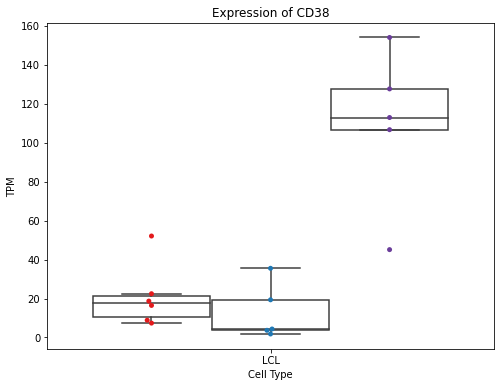

In [38]:
plot_KhaGil2013_tpm("CD38", ks = "Kallisto")

In [35]:
def table_KhaGil2013(gene, cell_types = ["LCL"], ks = "STAR"):
    ind = []
    folder = "Khan_Gilad_2013/" + ks
    if ks == "STAR":
        skel = "Khan_Gilad_2013_DESeq2_HumChp_LCL.txt"
    else:
        skel = "Khan_Gilad_2013_Kallisto_DESeq2_HumChp_LCL.txt"
    output = []
    for t in cell_types:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Chp", "Rhe")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        ind = ind + [t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [36]:
table_KhaGil2013("CD38", ks = "Kallisto")

CD38 DESeq2 Information

    Comparison  log2FoldChange       p-value           FDR
LCL     HumChp         0.54229  2.877154e-01  5.143314e-01
LCL     HumRhe        -2.36915  3.379709e-08  2.698942e-07


In [3]:
def plot_MarGag2013_tpm(gene, cell_types = ["iPSC"], ks = "STAR"):
    folder = "Marchetto_Gage_2013/" + ks
    if ks == "STAR":
        skel = "Marchetto_Gage_2013_DESeq2_HumChp_iPSC_tpm.txt"
    else:
        skel = "Marchetto_Gage_2013_Kallisto_DESeq2_HumChp_iPSC_Kallisto_tpm.txt"
    output = []
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Marchetto_Gage_2013_DESeq2_HumBon_iPSC_tpm.txt"
    else:
        skel = "Marchetto_Gage_2013_Kallisto_DESeq2_HumBon_iPSC_Kallisto_tpm.txt"
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Bonobo", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cell_types, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cell_types)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of ITGB1'}, xlabel='Cell Type', ylabel='TPM'>

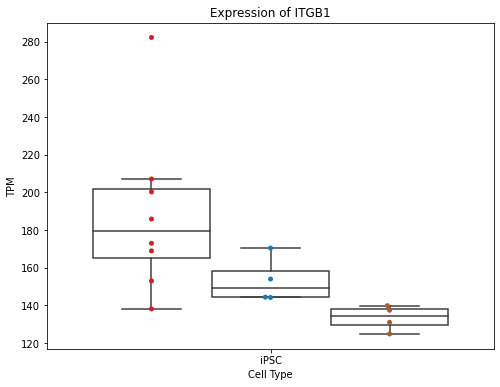

In [9]:
plot_MarGag2013_tpm("ITGB1", ks = "Kallisto")

In [11]:
def table_MarGag2013(gene, cell_types = ["iPSC"], ks = "STAR"):
    ind = []
    folder = "Marchetto_Gage_2013/" + ks
    if ks == "STAR":
        skel = "Marchetto_Gage_2013_DESeq2_HumChp_iPSC.txt"
    else:
        skel = "Marchetto_Gage_2013_Kallisto_DESeq2_HumChp_iPSC.txt"
    output = []
    for t in cell_types:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Chp", "Bon")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumBon")
        ind = ind + [t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [14]:
table_MarGag2013("CD151", ks = "Kallisto")

CD151 DESeq2 Information

     Comparison  log2FoldChange   p-value       FDR
iPSC     HumChp         0.32933  0.096025  0.247800
iPSC     HumBon         0.64615  0.001687  0.010217


In [30]:
def plot_PerBon2020_tpm(gene, cell_types = ["LCL"], ks = "STAR"):
    folder = "Perez_Bonet_2020/" + ks
    if ks == "STAR":
        skel = "Perez_Bonet_2020_DESeq2_HumChp_LCL_tpm.txt"
    else:
        skel = "Perez_Bonet_2020_Kallisto_DESeq2_HumChp_LCL.txt"
    output = []
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Perez_Bonet_2020_DESeq2_HumRhe_LCL_tpm.txt"
    else:
        skel = "Perez_Bonet_2020_Kallisto_DESeq2_HumRhe_LCL.txt"
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    if ks == "STAR":
        skel = "Perez_Bonet_2020_DESeq2_HumGor_LCL_tpm.txt"
    else:
        skel = "Perez_Bonet_2020_Kallisto_DESeq2_HumGor_LCL.txt"
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Gorilla", h = False)
    if ks == "STAR":
        skel = "Perez_Bonet_2020_DESeq2_HumOrg_LCL_tpm.txt"
    else:
        skel = "Perez_Bonet_2020_Kallisto_DESeq2_HumOrg_LCL.txt"
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Orangutan", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cell_types, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cell_types)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of CD38'}, xlabel='Cell Type', ylabel='TPM'>

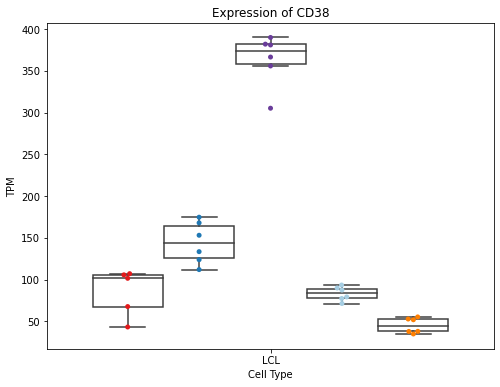

In [31]:
plot_PerBon2020_tpm("CD38")

In [33]:
def table_PerBon2020(gene, cell_types = ["LCL"], ks = "STAR"):
    ind = []
    folder = "Perez_Bonet_2020/" + ks
    if ks == "STAR":
        skel = "Perez_Bonet_2020_DESeq2_HumChp_LCL.txt"
    else:
        skel = "Perez_Bonet_2020_Kallisto_DESeq2_HumChp_LCL.txt"
    output = []
    for t in cell_types:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Chp", "Rhe")
        de3 = folder + "/" + skel.replace("Chp", "Gor")
        de4 = folder + "/" + skel.replace("Chp", "Org")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        output = read_de(de3, gene, output, "HumGor")
        output = read_de(de4, gene, output, "HumOrg")
        ind = ind + [t, t, t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [34]:
table_PerBon2020("CD38")

CD38 DESeq2 Information

    Comparison  log2FoldChange       p-value           FDR
LCL     HumChp        -0.80585  7.532410e-05  3.470946e-04
LCL     HumRhe        -2.11405  1.011937e-26  1.173623e-25
LCL     HumGor        -0.09698  6.052780e-01  8.098327e-01
LCL     HumOrg         0.84640  1.220169e-04  5.463940e-04


In [46]:
def plot_PerGil2011_tpm(gene, organs = ["Liver"], ks = "STAR"):
    folder = "Perry_Gilad_2011/" + ks
    if ks == "STAR":
        skel = "Perry_Gilad_2011_DESeq2_HumChp_Liver_tpm.txt"
    else:
        skel = "Perry_Gilad_2011_Kallisto_DESeq2_HumChp_Liver_Kallisto_tpm.txt"
    output = []
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Perry_Gilad_2011_DESeq2_HumRhe_Liver_tpm.txt"
    else:
        skel = "Perry_Gilad_2011_Kallisto_DESeq2_HumRhe_Liver_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    if ks == "STAR":
        skel = "Perry_Gilad_2011_DESeq2_HumMar_Liver_tpm.txt"
    else:
        skel = "Perry_Gilad_2011_Kallisto_DESeq2_HumMar_Liver_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Marmoset", h = False)
    if ks == "STAR":
        skel = "Perry_Gilad_2011_DESeq2_HumMou_Liver_tpm.txt"
    else:
        skel = "Perry_Gilad_2011_Kallisto_DESeq2_HumMou_Liver_Kallisto_tpm.txt"
    try:
        for t in organs:
            file = folder + "/" + skel
            output = read_file(file, output, gene, t, species = "Mouse", h = False)
    except:
        pass
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Organ")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of BST1'}, xlabel='Organ', ylabel='TPM'>

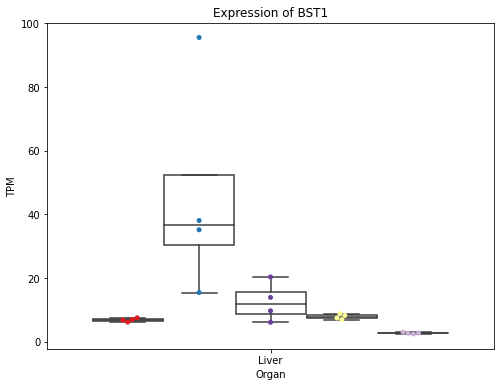

In [62]:
plot_PerGil2011_tpm("BST1")

In [59]:
def table_PerGil2011(gene, organs = ["Liver"], ks = "STAR"):
    ind = []
    folder = "Perry_Gilad_2011/" + ks
    if ks == "STAR":
        skel = "Perry_Gilad_2011_DESeq2_HumChp_Liver.txt"
    else:
        skel = "Perry_Gilad_2011_Kallisto_DESeq2_HumChp_Liver.txt"
    output = []
    for t in organs:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Chp", "Rhe")
        de3 = folder + "/" + skel.replace("Chp", "Mar")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        output = read_de(de3, gene, output, "HumMar")
        try:
            de4 = folder + "/" + skel.replace("Chp", "Mou")
            output = read_de(de4, gene, output, "HumMou")
            ind = ind + [t, t, t, t]
        except:
            ind = ind [t, t, t]
        
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [61]:
table_PerGil2011("CD38")

CD38 DESeq2 Information

      Comparison  log2FoldChange       p-value           FDR
Liver     HumChp        -1.59630  9.471982e-05  1.668637e-03
Liver     HumRhe         0.46359  2.203091e-01  4.398142e-01
Liver     HumMar         0.38339  3.671372e-01  5.664001e-01
Liver     HumMou        -2.33395  4.011086e-12  7.801184e-12


In [63]:
def plot_TriLiv2017_tpm(gene, organs = ["Liver"], ks = "STAR"):
    folder = "Trizzino_Liver_2017/" + ks
    if ks == "STAR":
        skel = "Trizzino_Liver_2017_DESeq2_HumChp_Liver_tpm.txt"
    else:
        skel = "Trizzino_Liver_2017_Kallisto_DESeq2_HumChp_Skin_Kallisto_tpm.txt"
    output = []
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Trizzino_Liver_2017_DESeq2_HumRhe_Liver_tpm.txt"
    else:
        skel = "Trizzino_Liver_2017_Kallisto_DESeq2_HumRhe_Skin_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    if ks == "STAR":
        skel = "Trizzino_Liver_2017_DESeq2_HumMar_Liver_tpm.txt"
    else:
        skel = "Trizzino_Liver_2017_Kallisto_DESeq2_HumMar_Skin_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Marmoset", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Organ")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of HMGCS1'}, xlabel='Organ', ylabel='TPM'>

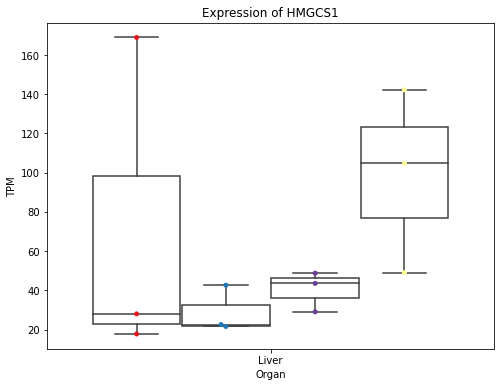

In [67]:
def table_TriLiv2017(gene, organs = ["Liver"], ks = "STAR"):
    ind = []
    folder = "Trizzino_Liver_2017/" + ks
    if ks == "STAR":
        skel = "Trizzino_Liver_2017_DESeq2_HumChp_Liver.txt"
    else:
        skel = "Trizzino_Liver_2017_Kallisto_DESeq2_HumChp_Skin.txt"
    output = []
    for t in organs:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Chp", "Rhe")
        de3 = folder + "/" + skel.replace("Chp", "Mar")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumRhe")
        output = read_de(de3, gene, output, "HumMar")
        ind = ind + [t, t, t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [68]:
table_TriLiv2017("HMGCS2")

HMGCS2 DESeq2 Information

      Comparison  log2FoldChange       p-value           FDR
Liver     HumChp         0.19782  6.653665e-01  9.213682e-01
Liver     HumRhe        -0.65536  1.733664e-01  3.285244e-01
Liver     HumMar         9.64763  1.474915e-24  1.107937e-22


In [75]:
def plot_TerSki2017_tpm(gene, organs = ["Skin"], ks = "STAR"):
    folder = "Terai_Skin_2019/" + ks
    if ks == "STAR":
        skel = "Terai_Skin_2019_DESeq2_HumChp_Skin_tpm.txt"
    else:
        skel = "Terai_Skin_2019_Kallisto_DESeq2_HumChp_Skin_Kallisto_tpm.txt"
    output = []
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    if ks == "STAR":
        skel = "Terai_Skin_2019_DESeq2_HumGor_Skin_tpm.txt"
    else:
        skel = "Terai_Skin_2019_Kallisto_DESeq2_HumGor_Skin_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Gorilla", h = False)
    if ks == "STAR":
        skel = "Terai_Skin_2019_DESeq2_HumOrg_Skin_tpm.txt"
    else:
        skel = "Terai_Skin_2019_Kallisto_DESeq2_HumOrg_Skin_Kallisto_tpm.txt"
    for t in organs:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Orangutan", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Organ"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Organ", y="TPM", hue = "Species", data=df, dodge = True, order = organs, palette = palette)
    ax = sns.boxplot(x="Organ", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = organs)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Organ")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of EDN1'}, xlabel='Organ', ylabel='TPM'>

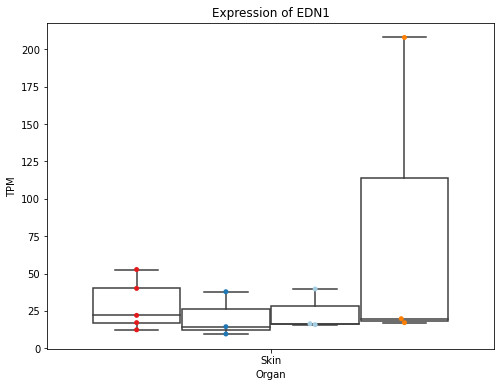

In [85]:
plot_TerSki2017_tpm("EDN1")

In [79]:
def table_TerSki2019(gene, organs = ["Skin"], ks = "STAR"):
    ind = []
    folder = "Terai_Skin_2019/" + ks
    if ks == "STAR":
        skel = "Terai_Skin_2019_DESeq2_HumChp_Skin.txt"
    else:
        skel = "Terai_Skin_2019_Kallisto_DESeq2_HumChp_Skin.txt"
    output = []
    for t in organs:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Chp", "Gor")
        de3 = folder + "/" + skel.replace("Chp", "Org")
        output = read_de(de, gene, output, "HumChp")
        output = read_de(de2, gene, output, "HumGor")
        output = read_de(de3, gene, output, "HumOrg")
        ind = ind + [t, t, t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [84]:
table_TerSki2019("EDNRB")

EDNRB DESeq2 Information

     Comparison  log2FoldChange   p-value       FDR
Skin     HumChp         0.64842  0.106915  0.553843
Skin     HumGor         0.34359  0.375514  0.990518
Skin     HumOrg        -0.47961  0.214601  0.582113


In [90]:
def plot_RomGil2015_tpm(gene, cell_types = ["iPSC"], ks = "STAR"):
    folder = "Romero_Gilad_2015/" + ks
    if ks == "STAR":
        skel = "Romero_Gilad_2015_DESeq2_HumChp_iPSC_tpm.txt"
    else:
        skel = "Romero_Gilad_2015_Kallisto_DESeq2_HumChp_iPSC_Kallisto_tpm.txt"
    output = []
    for t in cell_types:
        file = folder + "/" + skel.replace("D0", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    fig, ax = plt.subplots(figsize=(8,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cell_types, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cell_types)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of NANOG'}, xlabel='Cell Type', ylabel='TPM'>

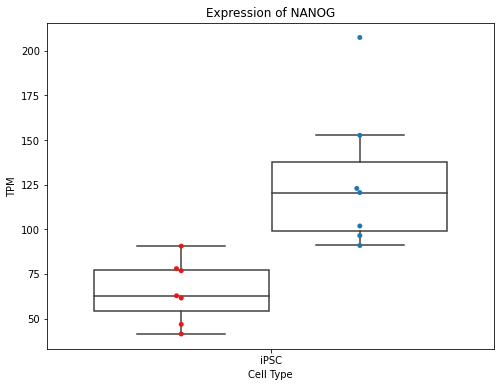

In [92]:
plot_RomGil2015_tpm("NANOG", ks = "Kallisto")

In [93]:
def table_RomGil2015(gene, cell_types = ["iPSC"], ks = "STAR"):
    ind = []
    folder = "Romero_Gilad_2015/" + ks
    if ks == "STAR":
        skel = "Romero_Gilad_2015_DESeq2_HumChp_iPSC.txt"
    else:
        skel = "Romero_Gilad_2015_Kallisto_DESeq2_HumChp_iPSC.txt"
    output = []
    for t in cell_types:
        de = folder + "/" + skel
        output = read_de(de, gene, output, "HumChp")
        ind = ind + [t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [94]:
table_RomGil2015("NANOG")

NANOG DESeq2 Information

     Comparison  log2FoldChange   p-value       FDR
iPSC     HumChp          -0.787  0.000022  0.000108


In [98]:
def plot_WunEna2014_tpm(gene, cell_types = ["iPSC"], ks = "STAR"):
    folder = "Wunderlich_Enard_2014/" + ks
    if ks == "STAR":
        skel = "Wunderlich_Enard_2014_DESeq2_HumBon_iPSC_tpm.txt"
    else:
        skel = "Wunderlich_Enard_2014_Kallisto_DESeq2_HumBon_iPSC_Kallisto_tpm.txt"
    output = []
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Bonobo", h = True)
    if ks == "STAR":
        skel = "Wunderlich_Enard_2014_DESeq2_HumGor_iPSC_tpm.txt"
    else:
        skel = "Wunderlich_Enard_2014_Kallisto_DESeq2_HumGor_iPSC_Kallisto_tpm.txt"
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Gorilla", h = False)
    if ks == "STAR":
        skel = "Wunderlich_Enard_2014_DESeq2_HumRhe_iPSC_tpm.txt"
    else:
        skel = "Wunderlich_Enard_2014_Kallisto_DESeq2_HumRhe_iPSC_Kallisto_tpm.txt"
    for t in cell_types:
        file = folder + "/" + skel
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cell_types, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cell_types)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of KLF4'}, xlabel='Cell Type', ylabel='TPM'>

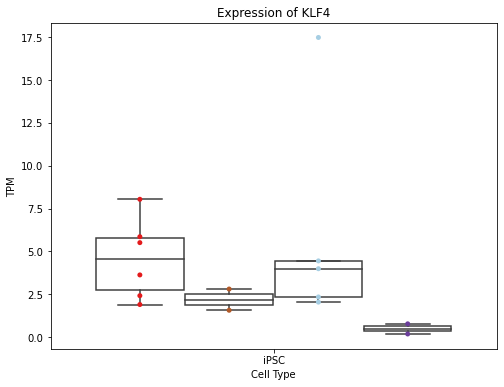

In [101]:
plot_WunEna2014_tpm("KLF4", ks = "Kallisto")

In [102]:
def table_WunEna2014(gene, cell_types = ["iPSC"], ks = "STAR"):
    ind = []
    folder = "Wunderlich_Enard_2014/" + ks
    if ks == "STAR":
        skel = "Wunderlich_Enard_2014_DESeq2_HumBon_iPSC.txt"
    else:
        skel = "Wunderlich_Enard_2014_Kallisto_DESeq2_HumBon_iPSC.txt"
    output = []
    for t in cell_types:
        de = folder + "/" + skel
        de2 = folder + "/" + skel.replace("Bon", "Gor")
        de3 = folder + "/" + skel.replace("Bon", "Rhe")
        output = read_de(de, gene, output, "HumBon")
        output = read_de(de2, gene, output, "HumGor")
        output = read_de(de3, gene, output, "HumRhe")
        ind = ind + [t, t, t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [104]:
table_WunEna2014("KLF4", ks = "Kallisto")

KLF4 DESeq2 Information

     Comparison  log2FoldChange   p-value       FDR
iPSC     HumBon         0.27762  0.518814  0.821059
iPSC     HumGor        -0.39818  0.276705  0.591404
iPSC     HumRhe         1.99192  0.003802  0.031296


In [24]:
def plot_AgoFra_2021_Hybrid(gene, times = ["iPSC", "D50", "D100", "D150", "D200"], ref = "humr"):
    if ref == "humr":
        folder = "Agoglia_Fraser_2021/STAR/Hybrid_Humr/"
    else:
        folder = "Agoglia_Fraser_2021/STAR/Hybrid_Chpr/"
    skel = "Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D50_" + ref + "_tpm.txt"
    output = []
    for t in times:
        if t != "iPSC":
            file = folder + "/" + skel.replace("D50", t)
        else:
            file = folder + "/" + "Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_iPSC_" + ref + "_tpm.txt"
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Timepoint"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Timepoint", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = times)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of STYXL1'}, xlabel='Cell Type', ylabel='TPM'>

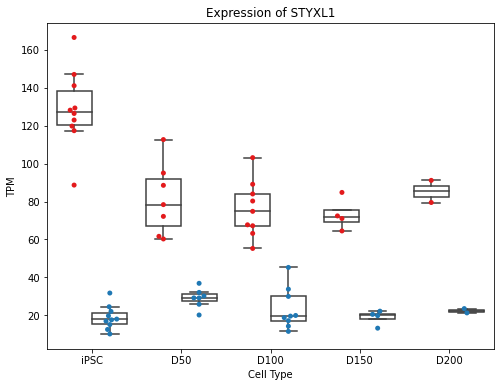

In [25]:
plot_AgoFra_2021_Hybrid("STYXL1", ref = "humr")

In [74]:
def AgoFra_2021_Hybrid(gene, times = ["iPSC", "D50", "D100", "D150", "D200"], ref = "humr"):
    ind = []
    if ref == "humr":
        folder = "Agoglia_Fraser_2021/STAR/Hybrid_humr/"
    else:
        folder = "Agoglia_Fraser_2021/STAR/Hybrid_chpr/"
    output = []
    for t in times:
        if t == "iPSC":
            skel = "Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_iPSC_" + ref + ".txt"
        else:
            skel = "Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D50_" + ref + ".txt"
        de = folder + "/" + skel.replace("D50", t)
        output = read_de(de, gene, output, "HumChp")
        ind = ind + [t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [75]:
AgoFra_2021_Hybrid("CD38", ref = "chpr")

CD38 DESeq2 Information

     Comparison  log2FoldChange       p-value           FDR
iPSC     HumChp         0.35945  1.328119e-01  2.993729e-01
D50      HumChp        -1.50028  2.312076e-03  1.406682e-02
D100     HumChp        -2.70465  1.201124e-13  4.995057e-12
D150     HumChp        -1.97962  8.204940e-08  3.458895e-06
D200     HumChp        -0.04154  2.210737e-02  6.017880e-01


In [19]:
def plot_AgoFra_2021_Parental(gene, times = ["iPSC", "D15", "D25", "D35", "D50", "D100", "D150", "D200"], ref = "humr"):
    if ref == "humr":
        folder = "Agoglia_Fraser_2021/STAR/Parental_humr/"
    else:
        folder = "Agoglia_Fraser_2021/STAR/Parental_chpr/"
    skel = "Agoglia_Fraser_2021_DESeq2_HumChp_Parental_CS_D15_" + ref + "_tpm.txt"
    output = []
    for t in times:
        if t != "iPSC":
            file = folder + "/" + skel.replace("D15", t)
        else:
            file = folder + "/" + "Agoglia_Fraser_2021_DESeq2_HumChp_Parental_iPSC_" + ref + "_tpm.txt"
        output = read_file_p(file, output, gene, t, species = "Chimp", h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Timepoint"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Timepoint", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = times)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of ITGB1'}, xlabel='Cell Type', ylabel='TPM'>

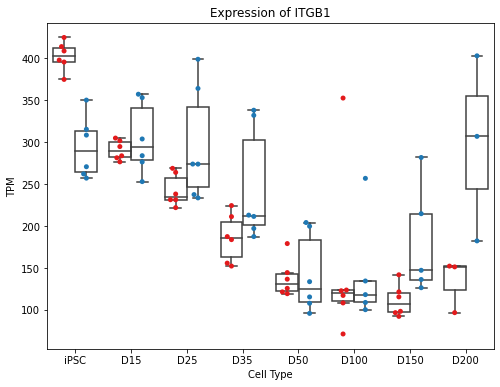

In [23]:
plot_AgoFra_2021_Parental("ITGB1",ref = "humr")

In [93]:
def AgoFra_2021_Parental(gene, times = ["iPSC", "D15", "D25", "D35", "D50", "D100", "D150", "D200"], ref = "humr"):
    ind = []
    if ref == "humr":
        folder = "Agoglia_Fraser_2021/STAR/Parental_humr/"
    else:
        folder = "Agoglia_Fraser_2021/STAR/Parental_chpr/"
    output = []
    for t in times:
        if t == "iPSC":
            skel = "Agoglia_Fraser_2021_DESeq2_HumChp_Parental_iPSC_" + ref + ".txt"
        else:
            skel = "Agoglia_Fraser_2021_DESeq2_HumChp_Parental_CS_D15_" + ref + ".txt"
        de = folder + "/" + skel.replace("D15", t)
        output = read_de(de, gene, output, "HumChp")
        ind = ind + [t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [95]:
AgoFra_2021_Parental("BST1")

BST1 DESeq2 Information

     Comparison  log2FoldChange       p-value           FDR
iPSC     HumChp        -2.63331  8.956937e-53  1.320792e-50
D15      HumChp        -1.97878  2.297824e-26  1.814618e-24
D25      HumChp        -1.88250  1.094754e-07  2.195615e-06
D35      HumChp        -1.71250  8.482945e-09  1.808209e-07
D50      HumChp        -2.12212  1.562078e-11  6.305800e-10
D100     HumChp        -1.48496  2.979336e-03  2.397983e-02
D150     HumChp        -2.10596  4.228128e-06  4.048844e-05
D200     HumChp        -2.22290  4.798014e-04  1.176437e-02


In [136]:
def plot_GokFra_2021_Hybrid(gene, cell_types = ["iPSC", "CNCC"], ref = "humr"):
    if ref == "humr":
        folder = "Gokhman_Fraser_2021/STAR/Hybrid_humr/"
    else:
        folder = "Gokhman_Fraser_2021/STAR/Hybrid_chpr/"
    skel = "Gokhman_Fraser_2021_DESeq2_HumChp_Hybrid_iPSC_" + ref + "_tpm.txt"
    output = []
    for t in cell_types:
        file = folder + "/" + skel.replace("iPSC", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cell_types, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cell_types)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of EVC2'}, xlabel='Cell Type', ylabel='TPM'>

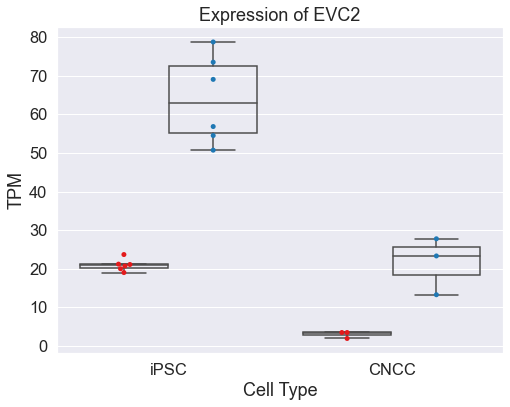

In [138]:
plot_GokFra_2021_Hybrid("EVC2", ref = "chpr")

In [145]:
def GokFra_2021_Hybrid(gene, cell_types = ["iPSC", "CNCC"], ref = "humr"):
    ind = []
    if ref == "humr":
        folder = "Gokhman_Fraser_2021/STAR/Hybrid_humr/"
    else:
        folder = "Gokhman_Fraser_2021/STAR/Hybrid_chpr/"
    output = []
    skel = "Gokhman_Fraser_2021_DESeq2_HumChp_Hybrid_iPSC_" + ref + ".txt"
    for t in cell_types:
        de = folder + "/" + skel.replace("iPSC", t)
        output = read_de(de, gene, output, "HumChp")
        ind = ind + [t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [146]:
GokFra_2021_Hybrid("EVC2")

EVC2 DESeq2 Information

     Comparison  log2FoldChange       p-value           FDR
iPSC     HumChp        -1.72330  1.392220e-41  1.771926e-39
CNCC     HumChp        -2.95822  7.908441e-45  1.727630e-42


In [156]:
def plot_GokFra_2021_Parental(gene, cell_types = ["iPSC", "CNCC"], ref = "humr"):
    if ref == "humr":
        folder = "Gokhman_Fraser_2021/STAR/Parental_humr"
    else:
        folder = "Gokhman_Fraser_2021/STAR/Parental_chpr"
    skel = "Gokhman_Fraser_2021_DESeq2_HumChp_Parental_iPSC_" + ref + "_tpm.txt"
    output = []
    for t in cell_types:
        file = folder + "/" + skel.replace("iPSC", t)
        if t == "iPSC":
            output = read_file_p(file, output, gene, t, species = "Chimp", h = True)
        else:
            output = read_file(file, output, gene, t, species = "Chimp", h = True)
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Cell Type"]
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.swarmplot(x="Cell Type", y="TPM", hue = "Species", data=df, dodge = True, order = cell_types, palette = palette)
    ax = sns.boxplot(x="Cell Type", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = cell_types)
    plt.legend([],[], frameon=False)
    ax.set_xlabel("Cell Type")
    ax.set_title("Expression of " + gene)
    return ax

<AxesSubplot:title={'center':'Expression of EVC2'}, xlabel='Cell Type', ylabel='TPM'>

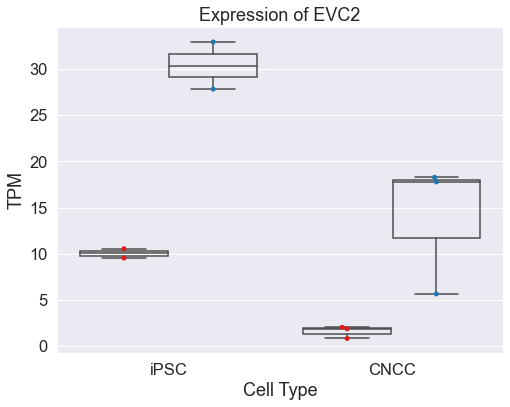

In [157]:
plot_GokFra_2021_Parental("EVC2")

In [158]:
def GokFra_2021_Parental(gene, cell_types = ["iPSC", "CNCC"], ref = "humr"):
    ind = []
    if ref == "humr":
        folder = "Gokhman_Fraser_2021/STAR/Parental_humr/"
    else:
        folder = "Gokhman_Fraser_2021/STAR/Parental_chpr/"
    output = []
    skel = "Gokhman_Fraser_2021_DESeq2_HumChp_Parental_iPSC_" + ref + ".txt"
    for t in cell_types:
        de = folder + "/" + skel.replace("iPSC", t)
        output = read_de(de, gene, output, "HumChp")
        ind = ind + [t]
    df = pd.DataFrame(output)
    df.columns = ["Comparison", "log2FoldChange", "p-value", "FDR"]
    df.index = ind
    print(gene + " DESeq2 Information")
    print("")
    print(df)

In [159]:
GokFra_2021_Parental("EVC2")

EVC2 DESeq2 Information

     Comparison  log2FoldChange       p-value           FDR
iPSC     HumChp        -1.47311  5.043009e-13  2.744875e-11
CNCC     HumChp        -3.00709  3.901821e-06  1.325900e-04


In [37]:
sns.set(font_scale = 1.5)
sns.set_style('white')
def plot_FeHaus2018_tpm(gene, times = ["Week0", "Week1", "Week2", "Week3", "Week4", "Week5"], ks = "STAR"):
    folder = "Field_Haussler_2018/" + ks
    output = []
    for t in times:
        if ks == "STAR":
            skel = "Field_Haussler_2018_DESeq2_HumChp_Week0.txt_tpm.txt"
        else:
            skel = "Field_Haussler_2018_Kallisto_DESeq2_HumChp_Week0_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Week0", t)
        output = read_file(file, output, gene, t, species = "Chimp", h = True)
        if ks == "STAR":
            skel = "Field_Haussler_2018_DESeq2_HumRhe_Week0.txt_tpm.txt"
        else:
            skel = "Field_Haussler_2018_Kallisto_DESeq2_HumRhe_Week0_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Week0", t)
        output = read_file(file, output, gene, t, species = "Rhesus", h = False)
        if ks == "STAR":
            skel = "Field_Haussler_2018_DESeq2_HumOrg_Week0.txt_tpm.txt"
        else:
            skel = "Field_Haussler_2018_Kallisto_DESeq2_HumOrg_Week0_Kallisto_tpm.txt"
        file = folder + "/" + skel.replace("Week0", t)
        output = read_file(file, output, gene, t, species = "Orangutan", h = False)
    fig, ax = plt.subplots(figsize=(12,6))
    df = pd.DataFrame(output)
    df.columns = ["Expression (TPM)", "Species", "Timepoint"]
    ax = sns.swarmplot(x="Timepoint", y="Expression (TPM)", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    ax = sns.boxplot(x="Timepoint", y="Expression (TPM)", hue = "Species", data=df, showfliers=False, order = times, palette = palette)
    plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0, frameon=True)
    ax.set_xlabel("Timepoint")
    ax.set_title("Expression of $\it{EDNRB}$ is human derived compared to rhesus macaque")
    return ax

<AxesSubplot:title={'center':'Expression of $\\it{EDNRB}$ is human derived compared to rhesus macaque'}, xlabel='Timepoint', ylabel='Expression (TPM)'>

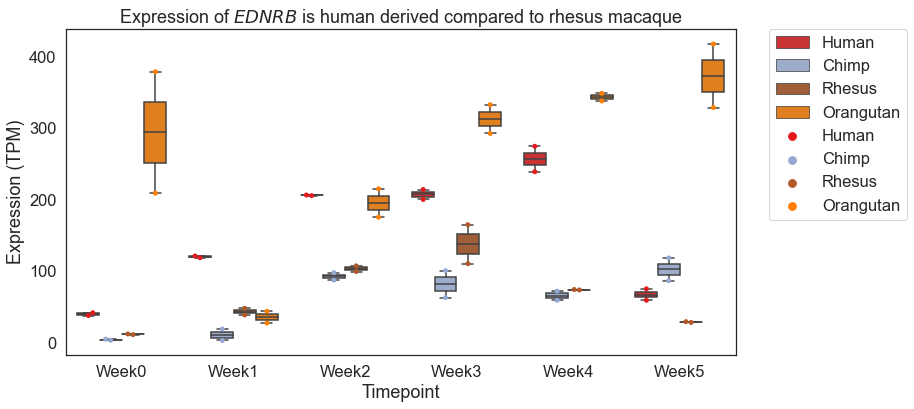

In [38]:
plot_FeHaus2018_tpm("EDNRB", ks = "STAR")

In [4]:
gluc = ['ENO3', 'MDH1', 'GPI', 'SLC25A13', 'PC', 'PRKACB', 'ENO1', 'MDH2', 'ENO2', 'GOT2', 'GAPDH', 'FBP2', 'SLC25A10', 'ALDOB']
df = pd.DataFrame()
for i in gluc:
    l = table_FeHaus2018(i, ks = "STAR")
    l = l.loc["Week5"]
    l["Gene"] = [i, i, i]
    df = pd.concat([df, l])
df

,Comparison,log2FoldChange,p-value,FDR,Gene
Week5,HumChp,-4.02345,2.869280e-19,1.505813e-17,ENO3
Week5,HumRhe,-2.76026,1.937769e-06,2.363015e-05,ENO3
Week5,HumOrg,-3.91454,1.257413e-22,4.757648e-21,ENO3
Week5,HumChp,-0.82951,3.730274e-04,1.937537e-03,MDH1
Week5,HumRhe,-0.67265,9.110959e-04,5.340114e-03,MDH1
Week5,HumOrg,-0.44245,1.945671e-02,5.297172e-02,MDH1
Week5,HumChp,-0.91903,1.030175e-05,7.690156e-05,GPI
Week5,HumRhe,-1.29605,2.973517e-13,1.106972e-11,GPI
Week5,HumOrg,-1.60643,8.146427e-16,1.783766e-14,GPI
Week5,HumChp,-1.27390,8.972094e-07,8.480990e-06,SLC25A13


Text(0, 0.5, 'log$_{2}$ Fold-Change')

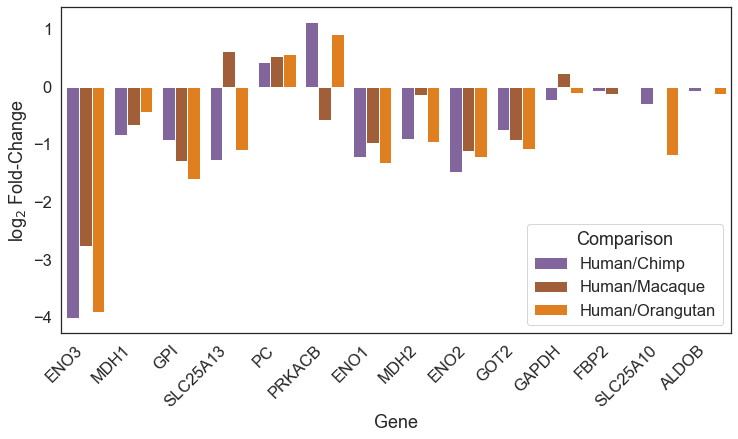

In [31]:
palette = {"chimp":"#95AAD3",
           "human":"#E31A1C",
          "Chimp":"#95AAD3",
           "Human":"#E31A1C",
          "Orangutan":"#FF7F00",
          "orangutan":"#FF7F00",
          "Gorilla":"black",
          "gorilla":"black",
          "Rhesus":"#B15928",
          "rhesus":"#B15928",
          "Human/Chimp":"#825CA6",
          "Human/Orangutan":"#FF7F00",
          "Human/Macaque":"#B15928"}
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=45, ha = "right")
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
ax = sns.barplot(data = df, x = "Gene", y = "log2FoldChange", hue = "Comparison", palette = palette)
plt.ylabel("log$_{2}$ Fold-Change")

Text(0, 0.5, 'log$_{2}$ Fold-Change')

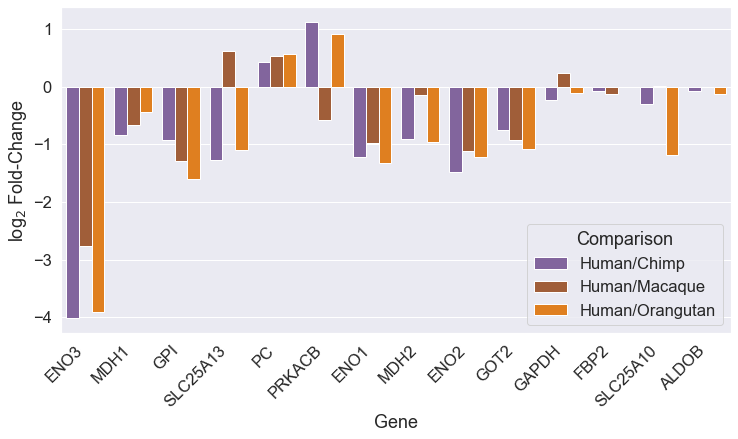

In [7]:
gluc = ['ENO3', 'MDH1', 'GPI', 'SLC25A13', 'PC', 'PRKACB', 'ENO1', 'MDH2', 'ENO2', 'GOT2', 'GAPDH', 'FBP2', 'SLC25A10', 'ALDOB']
df = pd.DataFrame()
for i in gluc:
    l = table_FeHaus2018(i, ks = "STAR")
    l = l.loc["Week5"]
    l["Comparison"] = ["Human/Chimp", "Human/Macaque", "Human/Orangutan"]
    l["Gene"] = [i, i, i]
    df = pd.concat([df, l])
    


Text(0, 0.5, 'log$_{2}$ Fold-Change')

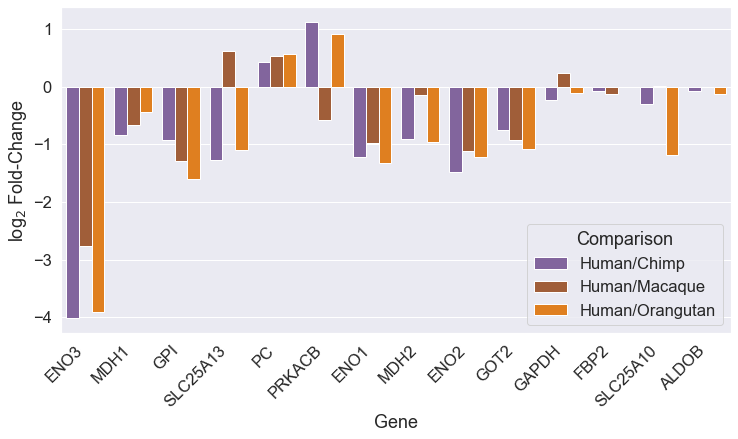

In [14]:

fig, ax = plt.subplots(figsize=(12,6))

plt.xticks(rotation=45, ha = "right")
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
ax = sns.barplot(data = df, x = "Gene", y = "log2FoldChange", hue = "Comparison", palette = palette)
plt.ylabel("log$_{2}$ Fold-Change")

In [42]:
print(df)

      Comparison  log2FoldChange       p-value           FDR      Gene
Week5     HumChp        -4.02345  2.869280e-19  1.505813e-17      ENO3
Week5     HumRhe        -2.76026  1.937769e-06  2.363015e-05      ENO3
Week5     HumOrg        -3.91454  1.257413e-22  4.757648e-21      ENO3
Week5     HumChp        -0.82951  3.730274e-04  1.937537e-03      MDH1
Week5     HumRhe        -0.67265  9.110959e-04  5.340114e-03      MDH1
Week5     HumOrg        -0.44245  1.945671e-02  5.297172e-02      MDH1
Week5     HumChp        -0.91903  1.030175e-05  7.690156e-05       GPI
Week5     HumRhe        -1.29605  2.973517e-13  1.106972e-11       GPI
Week5     HumOrg        -1.60643  8.146427e-16  1.783766e-14       GPI
Week5     HumChp        -1.27390  8.972094e-07  8.480990e-06  SLC25A13
Week5     HumRhe         0.61519  4.537919e-02  1.334667e-01  SLC25A13
Week5     HumOrg        -1.09391  1.883677e-06  1.260119e-05  SLC25A13
Week5     HumChp         0.43148  8.546118e-02  2.060021e-01        PC
Week5 

In [33]:
def plot_LanOrg2021_tpm(gene, times = ["D0", "D2", "D3", "D5", "D10", "D15", "D25"], ks = "STAR"):
    folder = "Lancaster_Organoid_2021/" + ks
    if ks == "STAR":
        skel = "Lancaster_Organoid_2021_DESeq2_HumGor_D0_tpm.txt"
    else:
        skel = "Lancaster_Organoid_2021_Kallisto_DESeq2_HumGor_D0_Kallisto_tpm.txt"
    output = []
    for t in times:
        file = folder + "/" + skel.replace("D0", t)
        output = read_file(file, output, gene, t, species = "Gorilla", h = True)
    fig, ax = plt.subplots(figsize=(12,6))
    df = pd.DataFrame(output)
    df.columns = ["Expression (TPM)", "Species", "Timepoint"]
    #ax = sns.swarmplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = times, palette = palette)
    sns.set_style("white")
    ax = sns.boxplot(x="Timepoint", y="Expression (TPM)", hue = "Species", data=df, showfliers=False, order = times, palette = palette)
    #plt.legend([],[], frameon=False)
    ax.set_xlabel("Timepoint")
    ax.set_title("Expression of $\it{EDNRB}$ is human derived compared to gorilla")
    return ax

<AxesSubplot:title={'center':'Expression of $\\it{EDNRB}$ is human derived compared to gorilla'}, xlabel='Timepoint', ylabel='Expression (TPM)'>

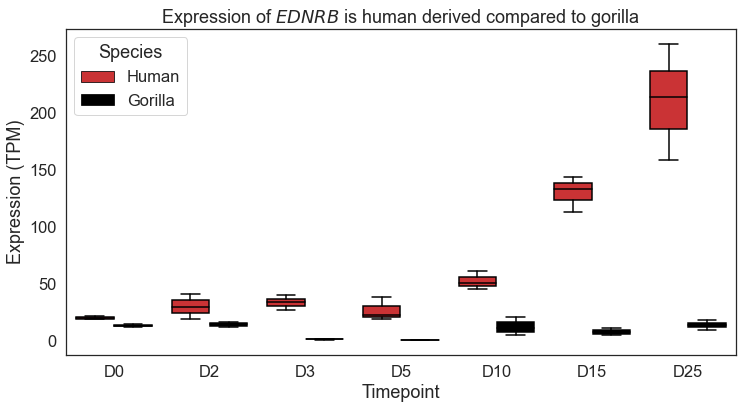

In [34]:
plot_LanOrg2021_tpm("EDNRB")

In [23]:
def plot_KhaBraReg2020_tpm(gene, regions = "Cortical", ks = "STAR", bonobo = False):
    output = []
    cortical_dict = {1:"SPMC", 2:"A2C", 3:'PCC', 4:"PostCC", 5:"PMC", 6:"S1C", 7:"A1C", 8:"M1C", 9:"V1C", 10:"V2C", 11:"AnCC_24", 12:"AnCC_32", 13:"PFC", 14:"ITC", 15:"IPC", 16:"DLPFC", 17:"OFC", 18:"VLPFC"}
    non_cortical_dict = {19:"AMY", 20:"ERC", 21:"HIP", 22:"Hypo", 23:"Thal", 24:"AntCorCal", 25:"PostCorCal", 26:"IntCaps", 27:"GlobPal", 28:"CbWM", 29:"SN", 30:"CbGM", 31:"Put", 32:"Caud", 33:"Nacc"}
    folder = "Khaitovich_Brain_Regions" + "/" + ks
    orde = []
    sns.set(font_scale = 2)
    sns.set_style("white")
    if regions == "Cortical":
        for key in cortical_dict.keys():
            t = cortical_dict[key]
            if t not in orde:
                orde.append(t)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumChp_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumChp_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Chimp", h = True)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumRhe_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumRhe_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Rhesus", h = False)
            if bonobo:
                if ks == "STAR":
                    skel = "He_Khaitovich_2017_DESeq2_HumBon_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
                else:
                    skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumBon_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
                file = folder + "/" + skel
                output = read_file_h(file, output, gene, t, species = "Bonobo", h = False)
    else:
        for key in non_cortical_dict.keys():
            t = non_cortical_dict[key]
            if t not in orde:
                orde.append(t)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumChp_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumChp_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Chimp", h = True)
            if ks == "STAR":
                skel = "He_Khaitovich_2017_DESeq2_HumRhe_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
            else:
                skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumRhe_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
            file = folder + "/" + skel
            output = read_file_h(file, output, gene, t, species = "Rhesus", h = False)
            if bonobo:
                if ks == "STAR":
                    skel = "He_Khaitovich_2017_DESeq2_HumBon_1_tpm.txt".replace("_1_tpm", "_" + str(key) + "_tpm")
                else:
                    skel = "He_Khaitovich_2017_Kallisto_DESeq2_HumBon_1_Kallisto_tpm.txt".replace("_1_Ka", "_" + str(key) + "_Ka")
                file = folder + "/" + skel
                output = read_file_h(file, output, gene, t, species = "Bonobo", h = False)
    fig, ax = plt.subplots(figsize=(18,6))
    df = pd.DataFrame(output)
    df.columns = ["Expression (TPM)", "Species", "Cortical Region"]
    #ax = sns.swarmplot(x="Region", y="TPM", hue = "Species", data=df, dodge = True, order = orde, palette = palette)
    ax = sns.boxplot(x="Cortical Region", y="Expression (TPM)", hue = "Species", data=df, showfliers=False, order = orde, palette = palette)
    #plt.legend([],[], frameon=False)
    ax.set_xlabel("Cortical Region")
    ax.set_title("Expression of " + gene + " Across Cortex in Adult Primates")
    plt.xticks(rotation=45, ha = "right")
    plt.legend(bbox_to_anchor=(1.3, 1))
    return ax

<AxesSubplot:title={'center':'Expression of KCNA1 Across Cortex in Adult Primates'}, xlabel='Cortical Region', ylabel='Expression (TPM)'>

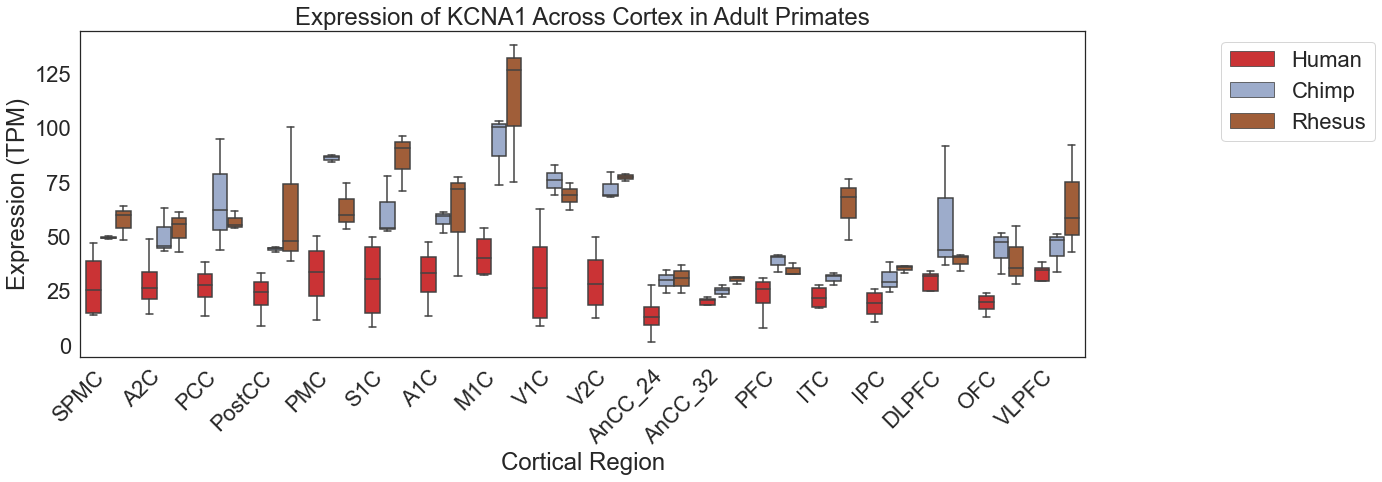

In [24]:
plot_KhaBraReg2020_tpm("KCNA1")

<AxesSubplot:title={'center':'Expression of KCNA1 Across Early Human Development'}, xlabel='Timepoint', ylabel='Expression (TPM)'>

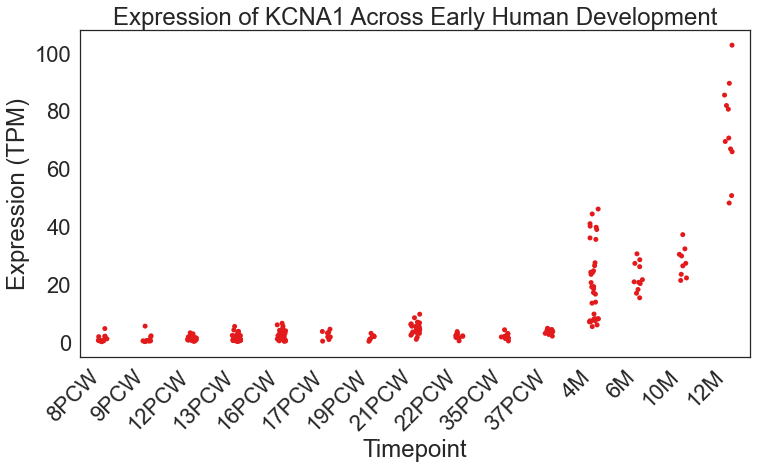

In [29]:
#Possible regions are A1C, AMY, CBC, DFC, HIP, IPC, ITC, M1C, MD, MFC, OFC, S1C, STC, STR, V1C, VFC, All_Cortical
#Note that for macaque we give the predicted age in human years based on their model
def plotBraSpa_tpm(gene, region = "All_Cortical", species = "Human", ks = "STAR", tt = False):
    convert_age = pd.read_csv("BrainSpan/Metadata_rhe.csv")
    d = {}
    for index, row in convert_age.iterrows():
        d[row[1]] = row[0]
    if species == "Human":
        timepoints = ["8PCW", "9PCW", "12PCW", "13PCW", "16PCW", "17PCW", "19PCW", "21PCW", "22PCW", "35PCW", "37PCW", "4M", "6M", "301days", "12M"]
        if ks == "STAR":
            file = "BrainSpan_DESeq2_Hum_DFC.txt_tpm.txt".replace("DFC", region)
        else:
            file = "BrainSpan_Kallisto_DESeq2_Hum_DFC_Kallisto_tpm.txt".replace("DFC", region)
        tpm = pd.read_csv('BrainSpan/' + ks + "/" + file, sep = "\t").set_index("Unnamed: 0")
        tpm_gene = tpm.loc[gene]
        output = []
        for index in tpm_gene.index:
            t = index.split("_")[3]
            if t in timepoints:
                if "301" in t:
                    output.append([tpm_gene[index], "Human", "10M"])
                else:
                    output.append([tpm_gene[index], "Human", t])
    if species == "Rhesus":
        timepoints = ["PCW15", "PCW16", "PCW17", "PCW18", "PCW20", "PCW24", "PCW26", "PCW27", "PCW36", "0.25", "0.75", "1.65", "1.75", "1.95", "2.65", "13.05", "13.85", "14.45", "15.75", "16.05", "16.45", "20.05", "21.05", "21.35", "22.65"]
        orde = ["E60", "E80", "E81", "E82", "E110", "E111", "P0", "P2", "7M", "1Y", "2Y", "3.5Y", "4Y", "5Y", "7Y", "11Y"]
        if ks == "STAR":
            file = "BrainSpan_DESeq2_Rhe_DFC.txt_tpm.txt".replace("DFC", region)
        else:
            file = "BrainSpan_Kallisto_DESeq2_Rhe_DFC_Kallisto_tpm.txt".replace("DFC", region)
        tpm = pd.read_csv('BrainSpan/' + ks + "/" + file, sep = "\t")
        tpm_gene = tpm.loc[gene]
        output = []
        for index in tpm_gene.index:
            t = index.split("_")[3]
            if t in timepoints:
                if not tt:
                    output.append([tpm_gene[index], "Rhesus", d[t]])
                else:
                    output.append([tpm_gene[index], "Rhesus", t])
    fig, ax = plt.subplots(figsize=(12,6))
    df = pd.DataFrame(output)
    df.columns = ["TPM", "Species", "Timepoint"]
    if species == "Rhesus" and not tt:
        ax = sns.stripplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = orde, palette = palette)
    else:
        timepoints[13] = "10M"
        ax = sns.stripplot(x="Timepoint", y="TPM", hue = "Species", data=df, dodge = True, order = timepoints, palette = palette)
    if region == "All_Cortical":
        if not tt and species == "Rhesus":
            ax = sns.boxplot(x="Timepoint", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = orde)
        else:
            pass
            #ax = sns.boxplot(x="Timepoint", y="TPM", hue = "Species", data=df, boxprops={'facecolor':'None'}, showfliers=False, order = timepoints)
    plt.legend([],[], frameon=False)
    plt.xticks(rotation=45, ha = "right")
    ax.set_xlabel("Timepoint")
    ax.set_ylabel("Expression (TPM)")
    ax.set_title("Expression of " + gene + " Across Early Human Development")
    return ax
plotBraSpa_tpm("KCNA1", ks = "STAR", region = "All_Cortical", species = "Human")
#plotBraSpa_tpm("KCNA2", ks = "STAR", region = "All_Cortical", species = "Rhesus")

In [169]:
v = pd.read_csv("BrainSpan/STAR/BrainSpan_DESeq2_Hum_All_Cortical.txt_tpm.txt", sep = "\t").T

In [170]:
v.columns = v.loc["Unnamed: 0"]
v = v.drop("Unnamed: 0", axis = 0)
v

Unnamed: 0,Human_HSB103_DFC_13PCW_9.8_humreffed_counts.txt,Human_HSB103_IPC_13PCW_10_humreffed_counts.txt,Human_HSB103_ITC_13PCW_9.5_humreffed_counts.txt,Human_HSB103_M1C_13PCW_10_humreffed_counts.txt,Human_HSB103_MFC_13PCW_9.9_humreffed_counts.txt,Human_HSB103_OFC_13PCW_9.3_humreffed_counts.txt,Human_HSB103_S1C_13PCW_10_humreffed_counts.txt,Human_HSB103_V1C_13PCW_9.9_humreffed_counts.txt,Human_HSB103_VFC_13PCW_9.4_humreffed_counts.txt,Human_HSB105_A1C_18Y_7.8_humreffed_counts.txt,...,Human_HSB97_V1C_17PCW_9.3_humreffed_counts.txt,Human_HSB97_VFC_17PCW_8.5_humreffed_counts.txt,Human_HSB98_A1C_19PCW_8.9_humreffed_counts.txt,Human_HSB98_DFC_19PCW_8.8_humreffed_counts.txt,Human_HSB98_IPC_19PCW_9_humreffed_counts.txt,Human_HSB98_MFC_19PCW_8.5_humreffed_counts.txt,Human_HSB98_MSC_19PCW_8.4_humreffed_counts.txt,Human_HSB98_STC_19PCW_8.2_humreffed_counts.txt,Human_HSB98_V1C_19PCW_9.2_humreffed_counts.txt,Human_HSB98_VFC_19PCW_8.8_humreffed_counts.txt
A1BG,1.353949,1.925879,0.345098,1.770254,0.724577,0.327335,1.428931,2.700276,0.696461,1.425428,...,2.655052,0.814216,2.676134,1.883825,3.140372,1.971403,2.368738,3.128969,2.753531,3.102183
A1BG-AS1,1.653384,3.206551,0.749878,3.712158,0.899693,0.824437,2.699217,2.523452,1.540883,2.918183,...,5.844194,4.520458,5.253394,2.185278,3.618704,2.821538,2.456583,4.802914,2.354068,4.804393
A1CF,0.0,0.03819,0.023952,0.0,0.014368,0.017039,0.037191,0.021625,0.0,0.0,...,0.01755,0.017846,0.034826,0.0,0.036326,0.01549,0.105688,0.085443,0.0,0.034449
A2M,35.73376,45.276848,57.046923,44.359853,39.681853,42.991446,39.626075,41.151055,41.173255,568.978726,...,35.851183,50.424003,21.120417,21.41198,19.683846,45.015214,20.053149,18.668569,17.114282,27.463342
A2M-AS1,0.111312,0.31101,0.234065,0.061574,0.468047,0.555042,0.060574,0.140883,0.062984,7.031314,...,0.514516,0.639444,0.397054,0.163113,0.473328,0.353201,0.401653,0.139163,0.367397,0.504978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11AP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221836,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYG11B,127.784214,124.176694,131.120789,137.411272,157.014223,154.653545,149.542384,112.586717,173.729387,38.584569,...,63.174042,78.313621,60.235447,55.492427,48.568505,63.099158,51.306664,62.667969,34.910567,71.295327
ZYX,105.36497,132.350588,75.331652,136.847763,55.073806,47.630482,109.427783,143.081216,67.291353,133.239841,...,215.424553,189.782855,149.865326,157.096384,125.78423,167.096743,133.790035,161.36405,184.382017,174.319272
ZYXP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
v.to_csv("BrainSpan_DESeq2_Hum_All_Cortical.txt_tpm.txt", sep = "\t")

In [104]:
bad = ["AMY", "STR", "HIP", "MD", "CBC"]
out = []
for index, row in v.iterrows():
    if index.split("_")[2] not in bad:
        out.append(row)
        
df = pd.DataFrame(out)
df.to_csv("BrainSpan_Kallisto_DESeq2_Rhe_All_Cortical_Kallisto_tpm.txt", sep = "\t")

In [122]:
v = pd.read_csv("BrainSpan_Kallisto_DESeq2_Rhe_All_Cortical_Kallisto_tpm.txt", sep = "\t")
v.T.to_csv("BrainSpan_Kallisto_DESeq2_Rhe_All_Cortical_Kallisto_tpm.txt", sep = "\t")